This notebook contains plots of various statistical and systems metrics gathered from the last run

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualization_utils
import math
import seaborn as sns
import numpy as np

In [2]:
from baseline_constants import (
    ACCURACY_KEY,
    BYTES_READ_KEY,
    BYTES_WRITTEN_KEY,
    CLIENT_ID_KEY,
    LOCAL_COMPUTATIONS_KEY,
    NUM_ROUND_KEY,
    NUM_SAMPLES_KEY)

def plot_accuracy_vs_round_number(realx_axis_values, 
                                  realy_axis_values,
                                  leafx_axis_values, 
                                  leafy_axis_values, 
                                  atype, 
                                  weighted=False, figsize=(10, 8), title_fontsize=16, **kwargs):

    plt.figure(figsize=figsize)
    title_weighted = 'Weighted' if weighted else 'Unweighted'
    plt.title(atype + ' Accuracy vs Round Number (%s)' % title_weighted, fontsize=title_fontsize)
    plt.plot(realx_axis_values, realy_axis_values, label='Testbed')
    plt.plot(leafx_axis_values, leafy_axis_values, label='LEAF')
    
    plt.legend(loc='center right')

    plt.ylabel('Accuracy')
    plt.xlabel('Round Number')
    plt.savefig('combined.png')

def get_accuracy_vs_round_number(stat_metrics, weighted=False):
    if weighted:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY).apply(_weighted_mean, ACCURACY_KEY, NUM_SAMPLES_KEY)
        accuracies = accuracies.reset_index(name=ACCURACY_KEY)

    else:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).mean()
        stds = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).std()

    percentile_10 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.10)) #.quantile(10)
    percentile_90 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.90)) #.quantile(90)

#     print(accuracies)
    return accuracies, percentile_10, percentile_90

def get_training_time_vs_round_number(stat_metrics):
    training_times = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).mean()
    return training_times

def _weighted_mean(df, metric_name, weight_name):
    d = df[metric_name]
    w = df[weight_name]
    
    try:
        return (w * d).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

## Multiple box plots on same figure against different configurations

In [3]:
import seaborn as sns

In [3]:
def get_data_to_plot(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

#     testbed_1k = fpath + 'metrics_stat_testbed_1k.csv' # change to None if desired
#     testbed_1k_pruned = fpath + 'metrics_stat_testbed_1k_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_10k.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_10k_pruned.csv' # change to None if desired
    
    testbed_100k = fpath + 'metrics_stat_testbed_100k.csv' # change to None if desired
    testbed_100k_pruned = fpath + 'metrics_stat_testbed_100k_pruned.csv' # change to None if desired
    
    testbed_1m = fpath + 'metrics_stat_testbed_1m.csv' # change to None if desired
    testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_pruned.csv' # change to None if desired
    
#     metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
#     metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)

    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
    metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

    metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
    metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
#     metrics_testbed_1k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
#     metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
#     metrics_testbed_1k['model_params'] = '1K'
    
    
#     metrics_testbed_1k_pruned["model_params"] = '1K'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['model_params'] = '10K'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["model_params"] = '10K'
    
    metrics_testbed_100k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_100k['model_params'] = '100K'
    metrics_testbed_100k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_100k_pruned["model_params"] = '100K'
    

    metrics_testbed_1m['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_1m['model_params'] = '1M'
    metrics_testbed_1m_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_1m_pruned["model_params"] = '1M'
    
#     metrics_testbed_1k['total_train_time'] = metrics_testbed_1k['total_train_time'].astype('float') / 1000
#     metrics_testbed_1k_pruned['total_train_time'] = metrics_testbed_1k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_10k['total_train_time'] = metrics_testbed_10k['total_train_time'].astype('float') / 1000
    metrics_testbed_10k_pruned['total_train_time'] = metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_100k['total_train_time'] = metrics_testbed_100k['total_train_time'].astype('float') / 1000
    metrics_testbed_100k_pruned['total_train_time'] = metrics_testbed_100k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_1m['total_train_time'] = metrics_testbed_1m['total_train_time'].astype('float') / 1000
    metrics_testbed_1m_pruned['total_train_time'] = metrics_testbed_1m_pruned['total_train_time'].astype('float') / 1000

    
    '''
    Plot training times for slow device only
    '''
    
    
#     df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
#     df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

    df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
    df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

    df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
    df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    panda_frames = []
    
#     panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
    panda_frames.append(df_slow_device_100k_pruned)
    panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
#     panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
    panda_frames.append(df_slow_device_100k)
    panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

In [4]:
def group_box_plot(data_to_plot):
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(15, 10))
    
    box_plot = sns.boxplot(x="model_params",y="total_train_time",data=data_to_plot, hue="prune_percentage", showfliers=False)
    box_plot.set_yscale("log")
    box_plot.set_ylabel('Training Time in Seconds (Log Scaled)', fontsize=25)
    box_plot.set_xlabel('Model Parameters', fontsize=25)
    box_plot.legend_.texts[0].set_text('Prune Percentage')
    print(box_plot.legend_)

    box_plot.legend(title="Prune Percentage", fontsize=25)
    box_plot.set_title('Comparison of Training Time Across 4 Model Sizes (Only slow client)', fontsize=25)
    
    groupby_obj = data_to_plot.groupby(['model_params', 'prune_percentage'])
    medians = groupby_obj['total_train_time'].median()
    mL1 = [str(np.round(s, 2)) for s in medians]
    
    
    quantiles = groupby_obj['total_train_time'].quantile([.5])
    
    '''
    Using different offsets for different model sizes due to huge median difference
    '''
    
    vertical_offset_1k = groupby_obj['total_train_time'].quantile([.5]) * 0.5 # offset from median for display
    vertical_offset_10k = groupby_obj['total_train_time'].quantile([.5]) * 0.4 # offset from median for display
    vertical_offset_100k = groupby_obj['total_train_time'].quantile([.5]) * 0.22 # offset from median for display
    vertical_offset_1m = groupby_obj['total_train_time'].quantile([.5]) * 0.10 # offset from median for display

    ind = 8
    for tick in range(len(box_plot.get_xticklabels())):
        vertical_offset = None
        if ind == 8:
            vertical_offset = vertical_offset_1k
            box_plot.text(tick-.30, quantiles[ind + 3] + vertical_offset[ind + 3]*0.8, mL1[ind + 3], horizontalalignment='center', color=box_plot.artists[0].get_facecolor(), size='large', weight='bold') # 100K
            box_plot.text(tick-.10, quantiles[ind] + vertical_offset[ind], mL1[ind],  horizontalalignment='center',  color=box_plot.artists[1].get_facecolor(), size='large', weight='bold') # 1K
            box_plot.text(tick + 0.1, quantiles[ind + 1] + vertical_offset[ind + 1]*1.1, mL1[ind+1], horizontalalignment='center', color=box_plot.artists[2].get_facecolor(), size='large', weight='bold') # 10K
            box_plot.text(tick + .3, quantiles[ind+2] + vertical_offset[ind + 2]*0.6, mL1[ind+2], horizontalalignment='center', color=box_plot.artists[3].get_facecolor(), size='large', weight='bold') # 1M
        elif ind == 4:
            vertical_offset = vertical_offset_10k
            box_plot.text(tick-.30, quantiles[ind + 3] + vertical_offset[ind + 3], mL1[ind + 3], horizontalalignment='center', color=box_plot.artists[0].get_facecolor(), size='large', weight='bold') # 100K
            box_plot.text(tick-.10, quantiles[ind] + vertical_offset[ind], mL1[ind],  horizontalalignment='center',  color=box_plot.artists[1].get_facecolor(), size='large', weight='bold') # 1K
            box_plot.text(tick + 0.1, quantiles[ind + 1] + vertical_offset[ind + 1], mL1[ind+1], horizontalalignment='center', color=box_plot.artists[2].get_facecolor(), size='large', weight='bold') # 10K
            box_plot.text(tick + .3, quantiles[ind+2] + vertical_offset[ind + 2]*1.4, mL1[ind+2], horizontalalignment='center', color=box_plot.artists[3].get_facecolor(), size='large', weight='bold') # 1M
        elif ind == 0:
            vertical_offset = vertical_offset_100k
            box_plot.text(tick-.30, quantiles[ind + 3] + vertical_offset[ind + 3]*1.1, mL1[ind + 3], horizontalalignment='center', color=box_plot.artists[0].get_facecolor(), size='large', weight='bold') # 100K
            box_plot.text(tick-.10, quantiles[ind] + vertical_offset[ind]*2.3, mL1[ind],  horizontalalignment='center',  color=box_plot.artists[1].get_facecolor(), size='large', weight='bold') # 1K
            box_plot.text(tick + 0.1, quantiles[ind + 1] + vertical_offset[ind + 1]*1.7, mL1[ind+1], horizontalalignment='center', color=box_plot.artists[2].get_facecolor(), size='large', weight='bold') # 10K
            box_plot.text(tick + .3, quantiles[ind+2] + vertical_offset[ind + 2]*1.8, mL1[ind+2], horizontalalignment='center', color=box_plot.artists[3].get_facecolor(), size='large', weight='bold') # 1M
        else:
            vertical_offset = vertical_offset_1m
            box_plot.text(tick-.30, quantiles[ind + 3] + vertical_offset[ind + 3], mL1[ind + 3], horizontalalignment='center', color=box_plot.artists[0].get_facecolor(), size='large', weight='bold') # 100K
            box_plot.text(tick-.10, quantiles[ind] + vertical_offset[ind], mL1[ind],  horizontalalignment='center',  color=box_plot.artists[1].get_facecolor(), size='large', weight='bold') # 1K
            box_plot.text(tick + 0.1, quantiles[ind + 1] + vertical_offset[ind + 1]*1.2, mL1[ind+1], horizontalalignment='center', color=box_plot.artists[2].get_facecolor(), size='large', weight='bold') # 10K
            box_plot.text(tick + .3, quantiles[ind+2] + vertical_offset[ind + 2], mL1[ind+2], horizontalalignment='center', color=box_plot.artists[3].get_facecolor(), size='large', weight='bold') # 1M
        
        
        
        if ind == 8:
            ind = 4
#             vertical_offset = groupby_obj['total_train_time'].quantile([1]) * 0.10
        elif ind == 4:
            ind = 0
        elif ind == 0:
            ind = 12
#         ind += 4
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#     plt.setp(box_plot._legend.get_title(), fontsize=20)
    plt.setp(box_plot.get_legend().get_texts(), fontsize=20) 
    plt.setp(box_plot.get_legend().get_title(), fontsize=20)
    
    plt.savefig('train_times_prunings.png')

Legend


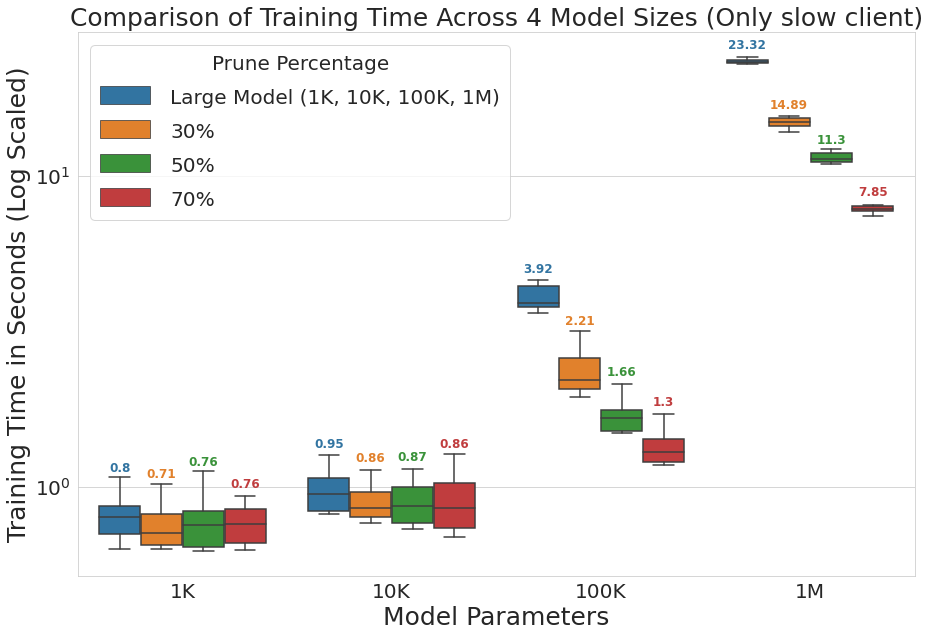

In [221]:
# combined_pruned_frame_0, combined_frame_0 = get_data_to_plot(0)
combined_pruned_frame_30, combined_frame_1 = get_data_to_plot(30, '14-07-2021')
combined_pruned_frame_50, combined_frame_2 = get_data_to_plot(50, '14-07-2021')
combined_pruned_frame_70, combined_frame_3 = get_data_to_plot(70, '14-07-2021')

panda_frames = []


panda_frames.append(combined_frame_1)
panda_frames.append(combined_pruned_frame_30)
panda_frames.append(combined_pruned_frame_50)
panda_frames.append(combined_pruned_frame_70)

combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)

group_box_plot(combined_frame)

## Bar Plot for 30,50,70% pruning for combined Training Times

In [323]:
def get_data_to_barplot(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1k.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1k_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_10k.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_10k_pruned.csv' # change to None if desired
    
    testbed_100k = fpath + 'metrics_stat_testbed_100k.csv' # change to None if desired
    testbed_100k_pruned = fpath + 'metrics_stat_testbed_100k_pruned.csv' # change to None if desired
    
    testbed_1m = fpath + 'metrics_stat_testbed_1m.csv' # change to None if desired
    testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_pruned.csv' # change to None if desired
    
    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)
    
    
    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
    metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

    metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
    metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
    metrics_testbed_1k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
    metrics_testbed_1k['model_params'] = '1K'
    
    
    metrics_testbed_1k_pruned["model_params"] = '1K'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['model_params'] = '10K'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["model_params"] = '10K'
    
    metrics_testbed_100k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_100k['model_params'] = '100K'
    metrics_testbed_100k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_100k_pruned["model_params"] = '100K'
    

    metrics_testbed_1m['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_1m['model_params'] = '1M'

#     metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1, ['prune_percentage']] = f'Large Model (1K, 10K, 100K, 1M)'
#     metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 0, ['prune_percentage']] = f'Fast Device (1K, 10K, 100K, 1M)'

    
    
    metrics_testbed_1m_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_1m_pruned["model_params"] = '1M'
    
    
#     print(metrics_testbed_1k['total_train_time']/1000 )
    
    metrics_testbed_1k['total_train_time'] = metrics_testbed_1k['total_train_time'].astype('float') / 1000
    metrics_testbed_1k_pruned['total_train_time'] = metrics_testbed_1k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_10k['total_train_time'] = metrics_testbed_10k['total_train_time'].astype('float') / 1000
    metrics_testbed_10k_pruned['total_train_time'] = metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_100k['total_train_time'] = metrics_testbed_100k['total_train_time'].astype('float') / 1000
    metrics_testbed_100k_pruned['total_train_time'] = metrics_testbed_100k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_1m['total_train_time'] = metrics_testbed_1m['total_train_time'].astype('float') / 1000
    metrics_testbed_1m_pruned['total_train_time'] = metrics_testbed_1m_pruned['total_train_time'].astype('float') / 1000

    '''
    Plot training times for slow device only
    '''
    
    
    df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
    df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

    df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
    df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

    df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
    df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
    panda_frames.append(df_slow_device_100k_pruned)
    panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
    panda_frames.append(df_slow_device_100k)
    panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned



def get_data_to_barplot_slow_fast(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1k.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1k_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_10k.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_10k_pruned.csv' # change to None if desired
    
    testbed_100k = fpath + 'metrics_stat_testbed_100k.csv' # change to None if desired
    testbed_100k_pruned = fpath + 'metrics_stat_testbed_100k_pruned.csv' # change to None if desired
    
    testbed_1m = fpath + 'metrics_stat_testbed_1m.csv' # change to None if desired
    testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_pruned.csv' # change to None if desired
    
    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)
    
    
    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
    metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

    metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
    metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
    metrics_testbed_1k['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
    metrics_testbed_1k['model_params'] = '1K'
    
    
    metrics_testbed_1k_pruned["model_params"] = '1K'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['model_params'] = '10K'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["model_params"] = '10K'
    
    metrics_testbed_100k['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_100k['model_params'] = '100K'
    metrics_testbed_100k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_100k_pruned["model_params"] = '100K'
    

    metrics_testbed_1m['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1m['model_params'] = '1M'
    metrics_testbed_1m_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_1m_pruned["model_params"] = '1M'
    
    
#     print(metrics_testbed_1k['total_train_time']/1000 )
    
    metrics_testbed_1k['total_train_time'] = metrics_testbed_1k['total_train_time'].astype('float') / 1000
    metrics_testbed_1k_pruned['total_train_time'] = metrics_testbed_1k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_10k['total_train_time'] = metrics_testbed_10k['total_train_time'].astype('float') / 1000
    metrics_testbed_10k_pruned['total_train_time'] = metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_100k['total_train_time'] = metrics_testbed_100k['total_train_time'].astype('float') / 1000
    metrics_testbed_100k_pruned['total_train_time'] = metrics_testbed_100k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_1m['total_train_time'] = metrics_testbed_1m['total_train_time'].astype('float') / 1000
    metrics_testbed_1m_pruned['total_train_time'] = metrics_testbed_1m_pruned['total_train_time'].astype('float') / 1000

    '''
    Plot training times for slow device only
    '''
    
    
    df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
    df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

    df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
    df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

    df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
    df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    
    metrics_testbed_1k['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1k['model_params'] = '1K'
    
    metrics_testbed_10k['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['model_params'] = '10K'
    
    metrics_testbed_100k['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_100k['model_params'] = '100K'
    
    metrics_testbed_1m['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1m['model_params'] = '1M'
    
    
    df_fast_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 0]
    df_fast_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 0]
    df_fast_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 0]
    df_fast_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 0]
    
    
    
    
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
    panda_frames.append(df_slow_device_100k_pruned)
    panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
    panda_frames.append(df_fast_device_1k)
    panda_frames.append(df_fast_device_10k)
    panda_frames.append(df_fast_device_100k)
    panda_frames.append(df_fast_device_1m)
    
    panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
    panda_frames.append(df_slow_device_100k)
    panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

In [331]:
# testbed_means_30, testbed_pruned_means_30 = get_data_to_barplot(30, '2021-03-30')
# testbed_means_50, testbed_pruned_means_50 = get_data_to_barplot(50, '2021-03-30')
# testbed_means_70, testbed_pruned_means_70 = get_data_to_barplot(70, '2021-03-30')

combined_pruned_frame_30, combined_frame_30 = get_data_to_barplot(30, '14-07-2021')
combined_pruned_frame_50, combined_frame_50 = get_data_to_barplot(50, '14-07-2021')
combined_pruned_frame_70, combined_frames_70 = get_data_to_barplot(70, '14-07-2021')

panda_frames = []


panda_frames.append(combined_frame_30)
panda_frames.append(combined_pruned_frame_30)
panda_frames.append(combined_pruned_frame_50)
panda_frames.append(combined_pruned_frame_70)

combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)

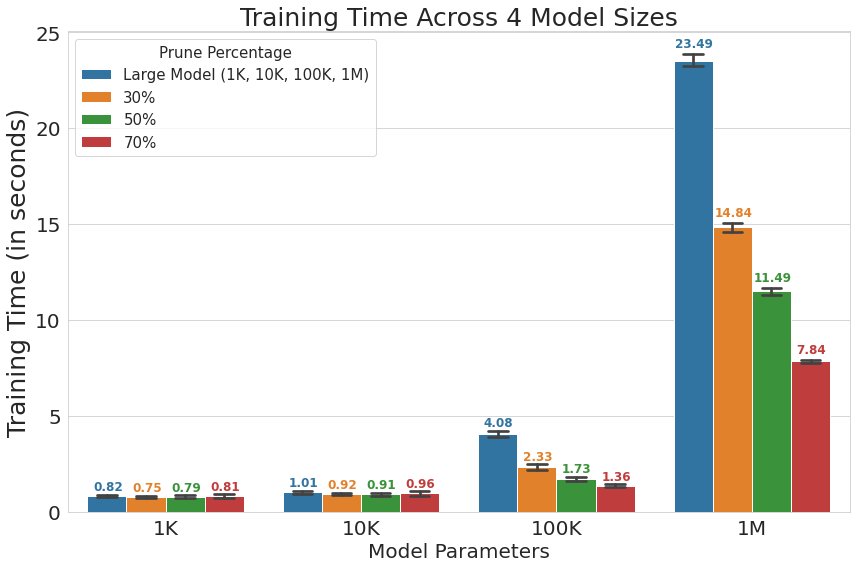

In [332]:
fig, ax = plt.subplots(figsize=(12,8))


bar_plot = sns.barplot(x="model_params",y="total_train_time",data=combined_frame, hue="prune_percentage",capsize=0.1)
# bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

bar_plot.set_title('Training Time Across 4 Model Sizes', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Training Time (in seconds)', fontsize=25)
ax.set_xlabel('Model Parameters', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(round(p.get_height(), 2), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
plt.savefig('barplot_ci_training_time_combined.png')

## Fast and slow client comparison

In [333]:
combined_pruned_frame_30_sf, combined_frame_30_sf = get_data_to_barplot_slow_fast(30, '14-07-2021')
combined_pruned_frame_50_sf, combined_frame_50_sf = get_data_to_barplot_slow_fast(50, '14-07-2021')
combined_pruned_frame_70_sf, combined_frames_70_sf = get_data_to_barplot_slow_fast(70, '14-07-2021')

panda_frames_sf = []


panda_frames_sf.append(combined_frame_30_sf)
panda_frames_sf.append(combined_pruned_frame_30_sf)
panda_frames_sf.append(combined_pruned_frame_50_sf)
panda_frames_sf.append(combined_pruned_frame_70_sf)


combined_frame_sf = pd.concat(panda_frames_sf, axis=0, ignore_index=True)

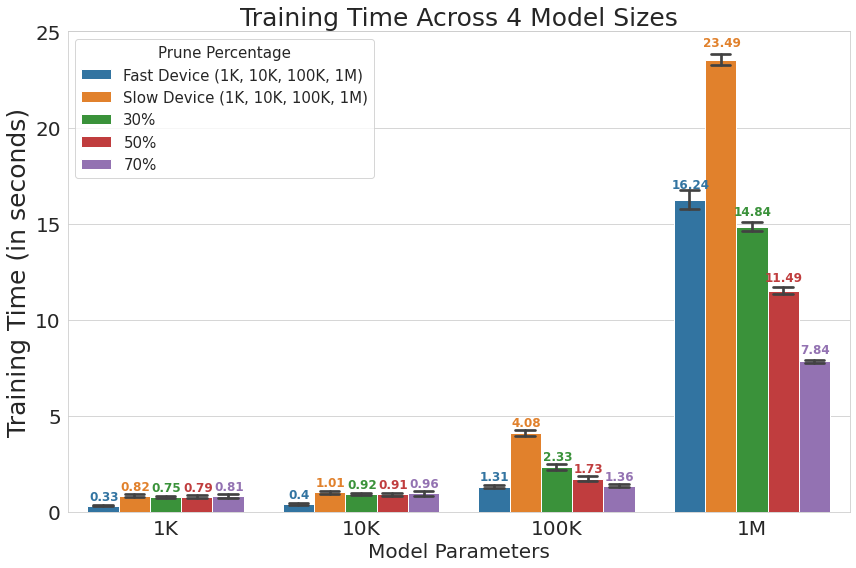

In [334]:
fig, ax = plt.subplots(figsize=(12,8))


bar_plot = sns.barplot(x="model_params",y="total_train_time",data=combined_frame_sf, hue="prune_percentage",capsize=0.1)
# bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

bar_plot.set_title('Training Time Across 4 Model Sizes', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Training Time (in seconds)', fontsize=25)
ax.set_xlabel('Model Parameters', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(round(p.get_height(), 2), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
plt.savefig('barplot_ci_training_time_slow_fast_combined.png')

## Round completion time

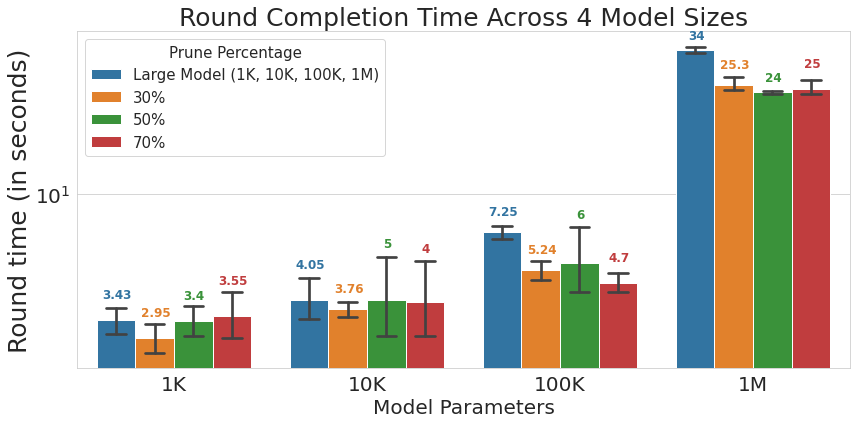

In [335]:
fig, ax = plt.subplots(figsize=(12,6))


bar_plot = sns.barplot(x="model_params",y="round_completion_time",data=combined_frame, hue="prune_percentage",capsize=0.1)
bar_plot.set_yscale("log")
bar_plot.set_ylabel('Round Completion Time')
bar_plot.set_xlabel('Model Parameters')          
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

bar_plot.set_title('Round Completion Time Across 4 Model Sizes', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Round time (in seconds)', fontsize=25)
ax.set_xlabel('Model Parameters', fontsize=20)
plt.tight_layout()
count = 0
for p in bar_plot.patches:
    if count == 0 or count == 4 or count ==8 or count == 14 : # 1K
        bar_plot.annotate(round(p.get_height(), 2), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.15), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')  
    elif count == 1 or count == 12: # 10K
        bar_plot.annotate(round(p.get_height(), 2), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.25), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')  
    elif count == 2 or count == 5 or count == 6 or count == 7: # 100K
        bar_plot.annotate(round(p.get_height(), 2), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.1), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')  
    elif count == 3:
        bar_plot.annotate(math.ceil(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.05), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
    elif count == 9:
        bar_plot.annotate(math.ceil(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.5), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
    elif count == 10:
        bar_plot.annotate(math.ceil(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.4), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
    elif count == 11:
        bar_plot.annotate(math.ceil(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.05), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
    elif count == 13:
        bar_plot.annotate(math.ceil(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.45), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
    elif count == 15:
        bar_plot.annotate(math.ceil(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()*1.15), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
      
    count += 1
plt.savefig('barplot_ci_round_time_combined.png')

## Quantifying training time for different cpu cores.

In [4]:

import seaborn as sns
        
def get_training_times(date, pruning_percentage, for_slow):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1m_1c.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1m_1c_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_1m_2c.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_1m_2c_pruned.csv' # change to None if desired

    testbed_100k = fpath + 'metrics_stat_testbed_1m_3c.csv' # change to None if desired
    testbed_100k_pruned = fpath + 'metrics_stat_testbed_1m_3c_pruned.csv' # change to None if desired

    testbed_1m = fpath + 'metrics_stat_testbed_1m_4c.csv' # change to None if desired
    testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_4c_pruned.csv' # change to None if desired

    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)

    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
    metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

    metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
    metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)

    mean_testbed_1k = np.mean(get_training_time_vs_round_number(metrics_testbed_1k)['total_train_time'])
    mean_testbed_1k_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_1k_pruned)['total_train_time'])

    mean_testbed_10k = np.mean(get_training_time_vs_round_number(metrics_testbed_10k)['total_train_time'])
    mean_testbed_10k_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_10k_pruned)['total_train_time'])

    mean_testbed_100k = np.mean(get_training_time_vs_round_number(metrics_testbed_100k)['total_train_time'])
    mean_testbed_100k_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_100k_pruned)['total_train_time'])

    mean_testbed_1m = np.mean(get_training_time_vs_round_number(metrics_testbed_1m)['total_train_time'])
    mean_testbed_1m_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_1m_pruned)['total_train_time'])
    
    
    '''
    
    Combined training times for slow and fast devices
    
    '''
    labels = ['1', '2', '3', '4']

    testbed_1k_mean = int(mean_testbed_1k)
    testbed_1k_pruned_mean = int(mean_testbed_1k_pruned)

    testbed_10k_mean = int(mean_testbed_10k)
    testbed_10k_pruned_mean = int(mean_testbed_10k_pruned)

    testbed_100k_mean = int(mean_testbed_100k)
    testbed_100k_pruned_mean = int(mean_testbed_100k_pruned)

    testbed_1m_mean = int(mean_testbed_1m)
    testbed_1m_pruned_mean = int(mean_testbed_1m_pruned)

    testbed_means = [testbed_1k_mean, testbed_10k_mean, testbed_100k_mean, testbed_1m_mean]
    testbed_pruned_means = [testbed_1k_pruned_mean, testbed_10k_pruned_mean, testbed_100k_pruned_mean, testbed_1m_pruned_mean]

    
    '''
    Plot training times for slow device only
    '''
    
    if for_slow == True:
        df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
        df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

        df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
        df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

        df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
        df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

        df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
        df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]

        mean_slow_testbed_1k = np.mean(df_slow_device_1k['total_train_time'])
        mean_slow_testbed_1k_pruned = np.mean(df_slow_device_1k_pruned['total_train_time'])

        mean_slow_testbed_10k = np.mean(df_slow_device_10k['total_train_time'])
        mean_slow_testbed_10k_pruned = np.mean(df_slow_device_10k_pruned['total_train_time'])

        mean_slow_testbed_100k = np.mean(df_slow_device_100k['total_train_time'])
        mean_slow_testbed_100k_pruned = np.mean(df_slow_device_100k_pruned['total_train_time'])

        mean_slow_testbed_1m = np.mean(df_slow_device_1m['total_train_time'])
        mean_slow_testbed_1m_pruned = np.mean(df_slow_device_1m_pruned['total_train_time'])

        testbed_1k_mean = int(mean_slow_testbed_1k)
        testbed_1k_pruned_mean = int(mean_slow_testbed_1k_pruned)

        testbed_10k_mean = int(mean_slow_testbed_10k)
        testbed_10k_pruned_mean = int(mean_slow_testbed_10k_pruned)

        testbed_100k_mean = int(mean_slow_testbed_100k)
        testbed_100k_pruned_mean = int(mean_slow_testbed_100k_pruned)

        testbed_1m_mean = int(mean_slow_testbed_1m)
        testbed_1m_pruned_mean = int(mean_slow_testbed_1m_pruned)

        testbed_means = [testbed_1k_mean, testbed_10k_mean, testbed_100k_mean, testbed_1m_mean]
        testbed_pruned_means = [testbed_1k_pruned_mean, testbed_10k_pruned_mean, testbed_100k_pruned_mean, testbed_1m_pruned_mean]
    
    return testbed_means, testbed_pruned_means

#     x = np.arange(len(labels))  # the label locations
#     width = 0.35  # the width of the bars

#     # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('Avg. training time (in milliseconds)', fontsize=15)
#     ax.set_xlabel('Model Parameters', fontsize=15)
#     ax.set_title('Average training time against different model sizes (Only slow client)', fontsize=15)
#     ax.set_xticks(x)
#     ax.set_xticklabels(labels, fontsize=15)
#     ax.legend(fontsize=15)


for_slow = True
testbed_means_50, testbed_pruned_means_50 = get_training_times('04-08-2021', 50, for_slow)



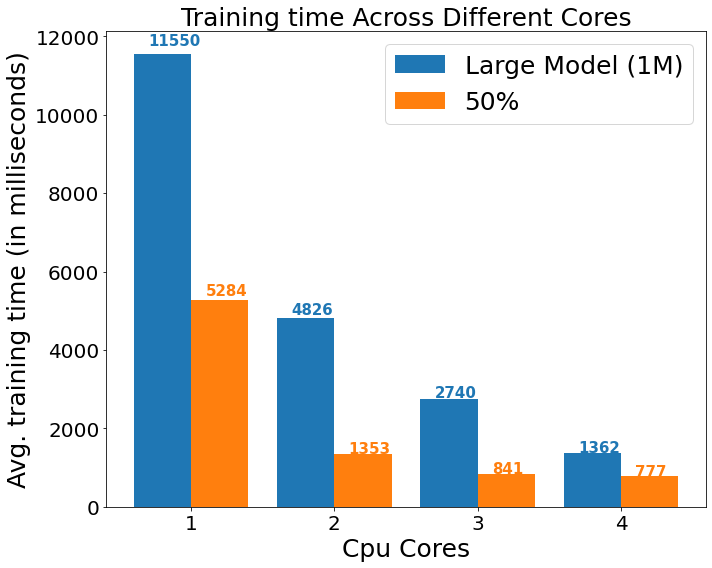

In [4]:
# Usage example:
data = {
    "Large Model (1M)": testbed_means_50,
    "50%": testbed_pruned_means_50,
}

fig, ax = plt.subplots(figsize=(10,8))

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        
        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
            ax.text(x+ x_offset - 0.1, y + y * 0.02, str(y), color=colors[i % len(colors)], fontweight='bold', fontsize=15)


        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(),title="", fontsize=25)


bar_plot(ax, data)

ax.set_ylabel('Avg. training time (in milliseconds)', fontsize=25)
ax.set_xlabel('Cpu Cores', fontsize=25)



file_name = "cores_training_time_"
title = ''
if for_slow == True:
    file_name += "slow.png"
    title = 'Only slow client'
else:
    file_name += "combined.png"
    title = 'Combined'

ax.set_title(f'Training time Across Different Cores', fontsize=25)

x_labels = ["1", "2", "3", "4"]
plt.xticks(range(4), x_labels)
ax.set_xticklabels(x_labels, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(file_name)
plt.show()

### Number of cores experiment using SNS

In [5]:
def get_data_to_barplot(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1m_1c.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1m_1c_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_1m_2c.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_1m_2c_pruned.csv' # change to None if desired

    testbed_100k = fpath + 'metrics_stat_testbed_1m_3c.csv' # change to None if desired
    testbed_100k_pruned = fpath + 'metrics_stat_testbed_1m_3c_pruned.csv' # change to None if desired

    testbed_1m = fpath + 'metrics_stat_testbed_1m_4c.csv' # change to None if desired
    testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_4c_pruned.csv' # change to None if desired
    
    
    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)

    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
    metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

    metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
    metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
    metrics_testbed_1k['prune_percentage'] = 'Large Model (1M)'
    metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
    metrics_testbed_1k['cpu_cores'] = '1'
    metrics_testbed_1k_pruned["cpu_cores"] = '1'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Large Model (1M)'
    metrics_testbed_10k['cpu_cores'] = '2'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["cpu_cores"] = '2'
    
    metrics_testbed_100k['prune_percentage'] = 'Large Model (1M)'
    metrics_testbed_100k['cpu_cores'] = '3'
    metrics_testbed_100k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_100k_pruned["cpu_cores"] = '3'
    

    metrics_testbed_1m['prune_percentage'] = 'Large Model (1M)'
    metrics_testbed_1m['cpu_cores'] = '4'
    metrics_testbed_1m_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_1m_pruned["cpu_cores"] = '4'
    
    '''
    Plot training times for slow device only
    '''
    
    
    df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
    df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

    df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
    df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

    df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
    df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
    panda_frames.append(df_slow_device_100k_pruned)
    panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
    panda_frames.append(df_slow_device_100k)
    panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

In [6]:
testbed_pruned_means_50, testbed_means_50 = get_data_to_barplot(50, '04-08-2021')

panda_frames = []


panda_frames.append(testbed_means_50)
panda_frames.append(testbed_pruned_means_50)

combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)



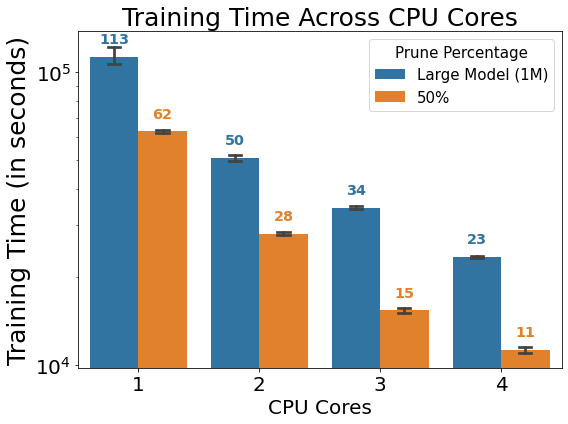

In [10]:
fig, ax = plt.subplots(figsize=(8,6))


bar_plot = sns.barplot(x="cpu_cores",y="total_train_time",data=combined_frame, hue="prune_percentage",capsize=0.1)
bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('CPU Cores')
bar_plot.legend_.texts[0].set_text('Prune Percentage')
              
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)
bar_plot.set_title('Training Time Across CPU Cores', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Training Time (in seconds)', fontsize=25)
ax.set_xlabel('CPU Cores', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(math.floor(p.get_height()/1000), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.07), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='x-large')    
plt.savefig('barplot_ci_training_time_combined_cores.png')

## Quantifying training time under different RAM sizes

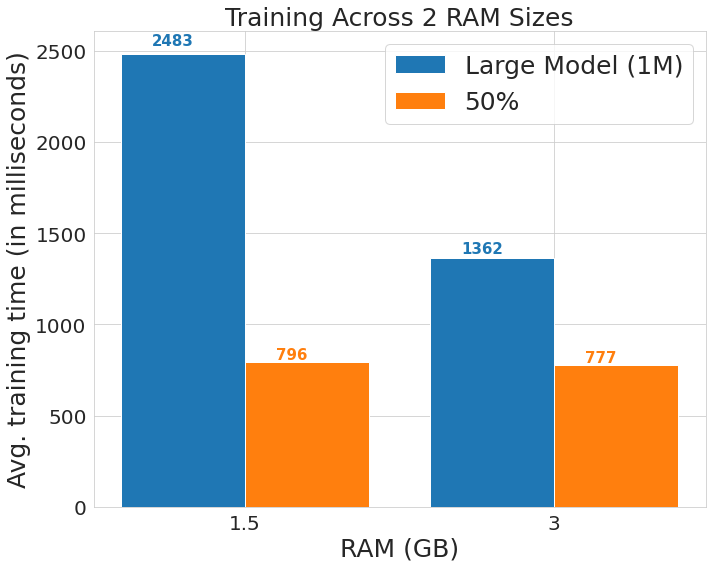

In [143]:

import seaborn as sns
        
def get_training_times():
    fpath = f'experiments/2021-05-14/2/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1m_1.5gb.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1m_1.5gb_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_1m_2.7gb.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_1m_2.7gb_pruned.csv' # change to None if desired

#     testbed_100k = fpath + 'metrics_stat_testbed_1m_3c.csv' # change to None if desired
#     testbed_100k_pruned = fpath + 'metrics_stat_testbed_1m_3c_pruned.csv' # change to None if desired

#     testbed_1m = fpath + 'metrics_stat_testbed_1m_4c.csv' # change to None if desired
#     testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_4c_pruned.csv' # change to None if desired

    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)

    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

#     metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
#     metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

#     metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
#     metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)

    mean_testbed_1k = np.mean(get_training_time_vs_round_number(metrics_testbed_1k)['total_train_time'])
    mean_testbed_1k_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_1k_pruned)['total_train_time'])

    mean_testbed_10k = np.mean(get_training_time_vs_round_number(metrics_testbed_10k)['total_train_time'])
    mean_testbed_10k_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_10k_pruned)['total_train_time'])

#     mean_testbed_100k = np.mean(get_training_time_vs_round_number(metrics_testbed_100k)['total_train_time'])
#     mean_testbed_100k_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_100k_pruned)['total_train_time'])

#     mean_testbed_1m = np.mean(get_training_time_vs_round_number(metrics_testbed_1m)['total_train_time'])
#     mean_testbed_1m_pruned = np.mean(get_training_time_vs_round_number(metrics_testbed_1m_pruned)['total_train_time'])
    
    
    '''
    
    Combined training times for slow and fast devices
    
    '''
    labels = ['1.5GB', '3GB']

    testbed_1k_mean = int(mean_testbed_1k)
    testbed_1k_pruned_mean = int(mean_testbed_1k_pruned)

    testbed_10k_mean = int(mean_testbed_10k)
    testbed_10k_pruned_mean = int(mean_testbed_10k_pruned)

#     testbed_100k_mean = int(mean_testbed_100k)
#     testbed_100k_pruned_mean = int(mean_testbed_100k_pruned)

#     testbed_1m_mean = int(mean_testbed_1m)
#     testbed_1m_pruned_mean = int(mean_testbed_1m_pruned)

#     testbed_means = [testbed_1k_mean, testbed_10k_mean, testbed_100k_mean, testbed_1m_mean]
#     testbed_pruned_means = [testbed_1k_pruned_mean, testbed_10k_pruned_mean, testbed_100k_pruned_mean, testbed_1m_pruned_mean]

    
    '''
    Plot training times for slow device only
    '''
    
    if for_slow == True:
        df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
        df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

        df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
        df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

#         df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
#         df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

#         df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
#         df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]

        mean_slow_testbed_1k = np.mean(df_slow_device_1k['total_train_time'])
        mean_slow_testbed_1k_pruned = np.mean(df_slow_device_1k_pruned['total_train_time'])

        mean_slow_testbed_10k = np.mean(df_slow_device_10k['total_train_time'])
        mean_slow_testbed_10k_pruned = np.mean(df_slow_device_10k_pruned['total_train_time'])

#         mean_slow_testbed_100k = np.mean(df_slow_device_100k['total_train_time'])
#         mean_slow_testbed_100k_pruned = np.mean(df_slow_device_100k_pruned['total_train_time'])

#         mean_slow_testbed_1m = np.mean(df_slow_device_1m['total_train_time'])
#         mean_slow_testbed_1m_pruned = np.mean(df_slow_device_1m_pruned['total_train_time'])

        testbed_1k_mean = int(mean_slow_testbed_1k)
        testbed_1k_pruned_mean = int(mean_slow_testbed_1k_pruned)

        testbed_10k_mean = int(mean_slow_testbed_10k)
        testbed_10k_pruned_mean = int(mean_slow_testbed_10k_pruned)

#         testbed_100k_mean = int(mean_slow_testbed_100k)
#         testbed_100k_pruned_mean = int(mean_slow_testbed_100k_pruned)

#         testbed_1m_mean = int(mean_slow_testbed_1m)
#         testbed_1m_pruned_mean = int(mean_slow_testbed_1m_pruned)

        testbed_means = [testbed_1k_mean, testbed_10k_mean]
        testbed_pruned_means = [testbed_1k_pruned_mean, testbed_10k_pruned_mean]
    
    return testbed_means, testbed_pruned_means

#     x = np.arange(len(labels))  # the label locations
#     width = 0.35  # the width of the bars

#     # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('Avg. training time (in milliseconds)', fontsize=15)
#     ax.set_xlabel('Model Parameters', fontsize=15)
#     ax.set_title('Average training time against different model sizes (Only slow client)', fontsize=15)
#     ax.set_xticks(x)
#     ax.set_xticklabels(labels, fontsize=15)
#     ax.legend(fontsize=15)



def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        
        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
            ax.text(x+ x_offset - 0.1, y + y * 0.02, str(y), color=colors[i % len(colors)], fontweight='bold', fontsize=15)


        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(),title="", fontsize=25)

for_slow = True
testbed_means_50, testbed_pruned_means_50 = get_training_times()

# Usage example:
data = {
    "Large Model (1M)": testbed_means_50,
    "50%": testbed_pruned_means_50,
}

fig, ax = plt.subplots(figsize=(10,8))

bar_plot(ax, data)

ax.set_ylabel('Avg. training time (in milliseconds)', fontsize=25)
ax.set_xlabel('RAM (GB)', fontsize=25)



file_name = "ram_training_time_"
title = ''
if for_slow == True:
    file_name += "slow.png"
    title = 'Only slow client'
else:
    file_name += "combined.png"
    title = 'Combined'

ax.set_title(f'Training Across 2 RAM Sizes', fontsize=25)

x_labels = ["1.5", "3"]
plt.xticks(range(2), x_labels)
ax.set_xticklabels(x_labels, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig(file_name)
plt.tight_layout()
plt.show()

### Barplot using Seaborn

In [53]:
def get_data_to_barplot(pruning_percentage, date):
#     fpath = f'experiments/2021-05-14/2/'

    fpath = f'experiments/2021-05-21/'
    pruning_percentage = '50'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1m_1.5gb.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1m_1.5gb_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_1m_2.7gb.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_1m_2.7gb_pruned.csv' # change to None if desired
    
    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)

    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_1k['prune_percentage'] = 'Large Model (1M)'
    metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
    metrics_testbed_1k['ram_size'] = '1.5'
    metrics_testbed_1k_pruned["ram_size"] = '1.5'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Large Model (1M)'
    metrics_testbed_10k['ram_size'] = '3'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["ram_size"] = '3'
    
    '''
    Plot training times for slow device only
    '''
    
    
    df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
    df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

#     df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
#     df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

#     df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
#     df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
#     panda_frames.append(df_slow_device_100k_pruned)
#     panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
#     panda_frames.append(df_slow_device_100k)
#     panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

In [54]:
testbed_pruned_means_50, testbed_means_50 = get_data_to_barplot(50, '2021-05-14')

panda_frames = []


panda_frames.append(testbed_means_50)
panda_frames.append(testbed_pruned_means_50)

combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)

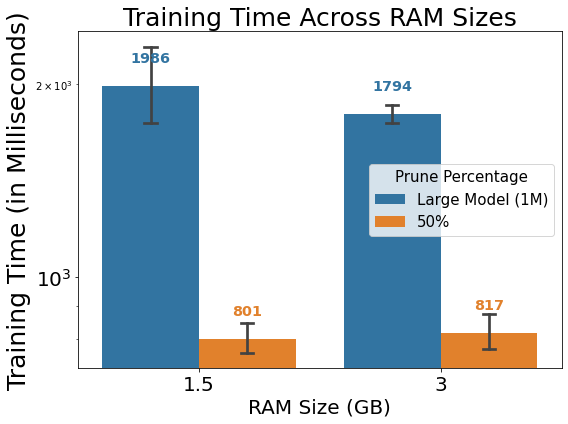

In [55]:
fig, ax = plt.subplots(figsize=(8,6))


bar_plot = sns.barplot(x="ram_size",y="total_train_time",data=combined_frame, hue="prune_percentage",capsize=0.05)
bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('RAM Size (GB)')
bar_plot.legend_.texts[0].set_text('Prune Percentage')
              
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)
bar_plot.set_title('Training Time Across RAM Sizes', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Training Time (in Milliseconds)', fontsize=25)
ax.set_xlabel('RAM Size (GB)', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(math.floor(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.07), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='x-large')    
plt.savefig('barplot_ci_training_time_combined_ram.png')

## Cpu utilization of kswapd & application.

In [40]:
col_list = ['PID','USER','PR','NI','VIRT','RES','SHR','S','[%CPU]','%MEM','TIME+','ARGS']

df_kswapd = pd.read_csv('experiments/2021-05-14/2/stats_1.5gb_kswapd.csv', delim_whitespace=True)
df_kswapd.to_csv('experiments/2021-05-14/2/stats_1.5gb_kswapd_updated.csv')

In [45]:
df_kswapd = pd.read_csv('experiments/2021-05-14/2/stats_1.5gb_kswapd_updated.csv')
df_syft = pd.read_csv('experiments/2021-05-14/2/stats_1.5gb_syft_updated.csv')

In [48]:

df_kswapd_pruned = pd.read_csv('experiments/2021-05-14/2/stats_1.5gb_kswapd_pruned.csv', delim_whitespace=True)
df_kswapd_pruned.to_csv('experiments/2021-05-14/2/stats_1.5gb_kswapd_pruned_updated.csv')


In [49]:
df_syft_pruned = pd.read_csv('experiments/2021-05-14/2/stats_1.5gb_syft_pruned.csv', delim_whitespace=True)
df_syft_pruned.to_csv('experiments/2021-05-14/2/stats_1.5gb_syft_pruned_updated.csv')

In [57]:
df_kswapd_pruned = pd.read_csv('experiments/2021-05-14/2/stats_1.5gb_kswapd_pruned_updated.csv')
df_syft_pruned = pd.read_csv('experiments/2021-05-14/2/stats_1.5gb_syft_pruned_updated.csv')

In [47]:
df_syft.cpu

0      40
1      40
2      40
3      40
4      40
       ..
180    40
181    40
182    40
183    40
184    40
Name: cpu, Length: 185, dtype: int64

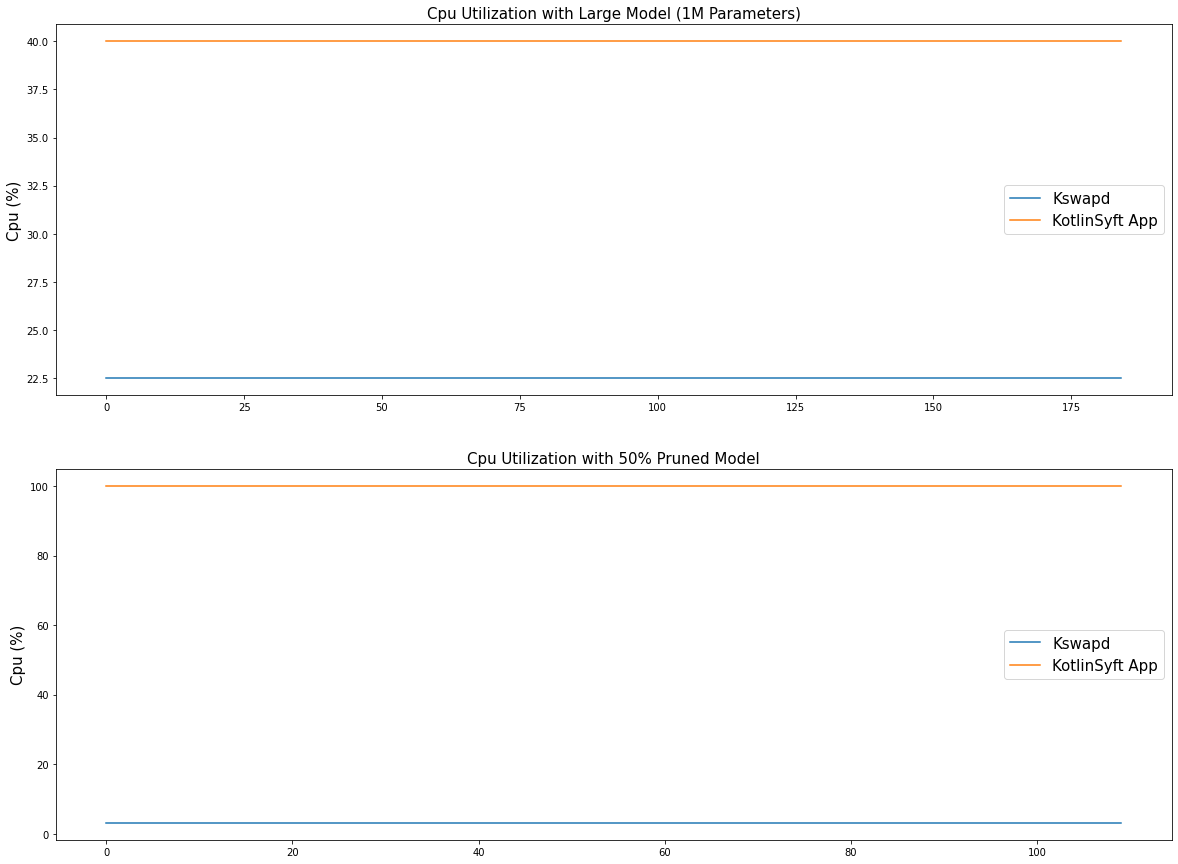

In [68]:
fig, axs = plt.subplots(2, figsize=(20, 15))

# Specify how our lines should look
axs[0].plot(range(0, len(df_kswapd)), df_kswapd.cpu, label='Kswapd')
axs[0].plot(range(0, len(df_syft)), df_syft.cpu, label='KotlinSyft App')
axs[0].legend(loc='best', fontsize=15);
axs[0].set_title('Cpu Utilization with Large Model (1M Parameters)', fontsize=15)
axs[0].set_ylabel('Cpu (%)', fontsize=15)


axs[1].plot(range(0, len(df_kswapd_pruned)), df_kswapd_pruned.cpu, label='Kswapd')
axs[1].plot(range(0, len(df_syft_pruned)), df_syft_pruned.cpu, label='KotlinSyft App')
axs[1].legend(loc='best', fontsize=15);
axs[1].set_title('Cpu Utilization with 50% Pruned Model', fontsize=15)
axs[1].set_ylabel('Cpu (%)', fontsize=15)
plt.savefig('daemons_stat.png')

## Memory Utilization for RAM sizes

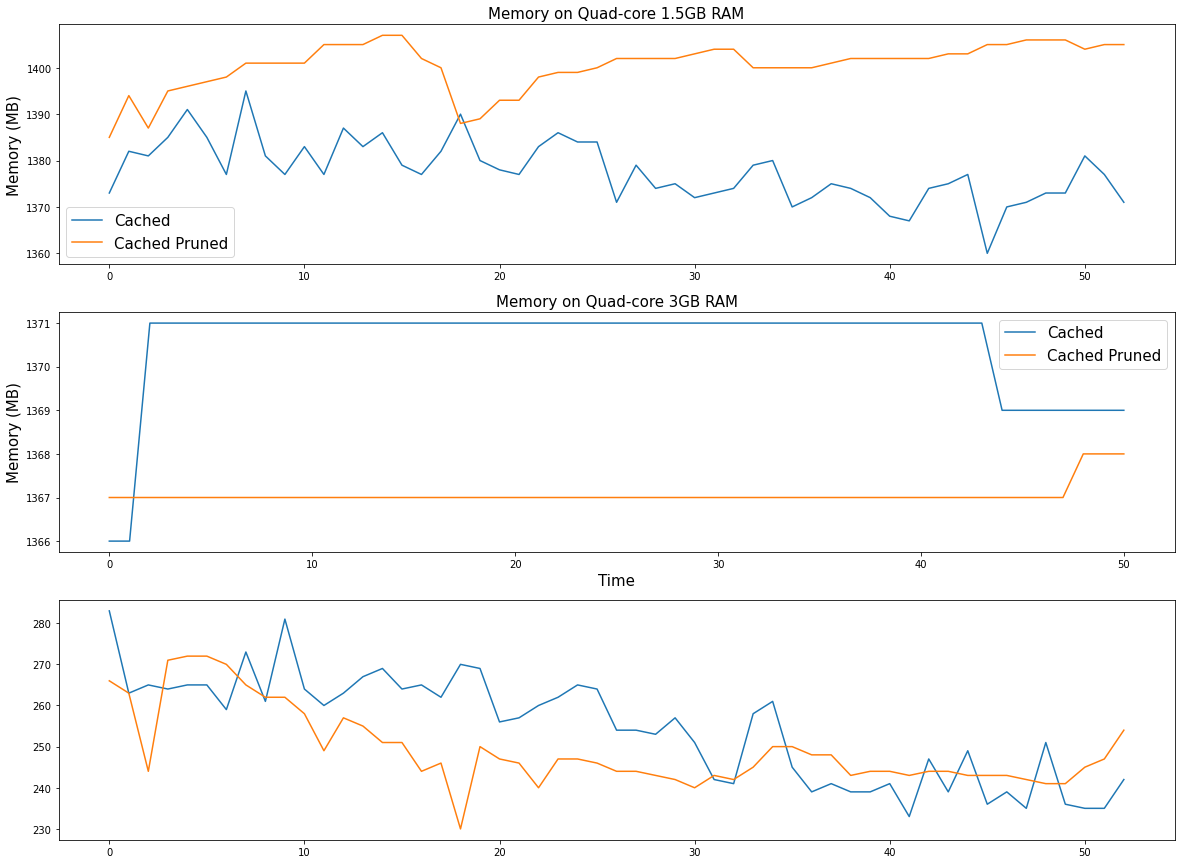

In [9]:
fig, axs = plt.subplots(3, figsize=(20, 15))
fpath = 'experiments/2021-05-14/2/'
df_mem_25 = pd.read_csv(fpath +'mem_testbed_1m_1.5gbram.csv')
df_mem_pruned_25 = pd.read_csv(fpath + 'mem_testbed_1m_1.5gbram_pruned.csv')
cached_mem_25 = df_mem_25['Cached_Memory(MB)']
cached_mem_pruned_25 = df_mem_pruned_25['Cached_Memory(MB)']
free_mem_25 = df_mem_25['Free_Memory(MB)']
free_mem_25_pruned = df_mem_pruned_25['Free_Memory(MB)']

df_mem_2p7 = pd.read_csv(fpath +'mem_testbed_1m_2.7gbram.csv')
df_mem_2p7_pruned = pd.read_csv(fpath + 'mem_testbed_1m_2.7gbram_pruned.csv')
cached_mem_2p7 = df_mem_2p7['Cached_Memory(MB)']
cached_mem_2p7_pruned = df_mem_2p7_pruned['Cached_Memory(MB)']
free_mem_2p7 = df_mem_2p7['Free_Memory(MB)']
free_mem_2p7_pruned = df_mem_2p7_pruned['Free_Memory(MB)']


iterations_25 = range(0, len(df_mem_25))
iterations_25_pruned = range(0, len(df_mem_pruned_25))

axs[0].plot(iterations_25_pruned, cached_mem_25[:len(iterations_25_pruned)], label='Cached')
axs[0].plot(iterations_25_pruned, cached_mem_pruned_25, label='Cached Pruned')

axs[0].legend(loc='best', fontsize=15);
axs[0].set_ylabel('Memory (MB)', fontsize=15)
axs[0].set_title('Memory on Quad-core 1.5GB RAM', fontsize=15)

axs[1].plot(range(0, len(cached_mem_2p7_pruned)), cached_mem_2p7[:len(cached_mem_2p7_pruned)], label='Cached')
axs[1].plot(range(0, len(cached_mem_2p7_pruned)), cached_mem_2p7_pruned, label='Cached Pruned')


axs[2].plot(iterations_25_pruned, free_mem_25[:len(iterations_25_pruned)], label='Free')
axs[2].plot(iterations_25_pruned, free_mem_25_pruned, label='Free Pruned')

axs[1].legend(loc='best', fontsize=15);
axs[1].set_ylabel('Memory (MB)', fontsize=15)
axs[1].set_title('Memory on Quad-core 3GB RAM', fontsize=15)
axs[1].set_xlabel('Time', fontsize=15)
plt.savefig(f'memory_50_ram.png')

## Understanding memory pages

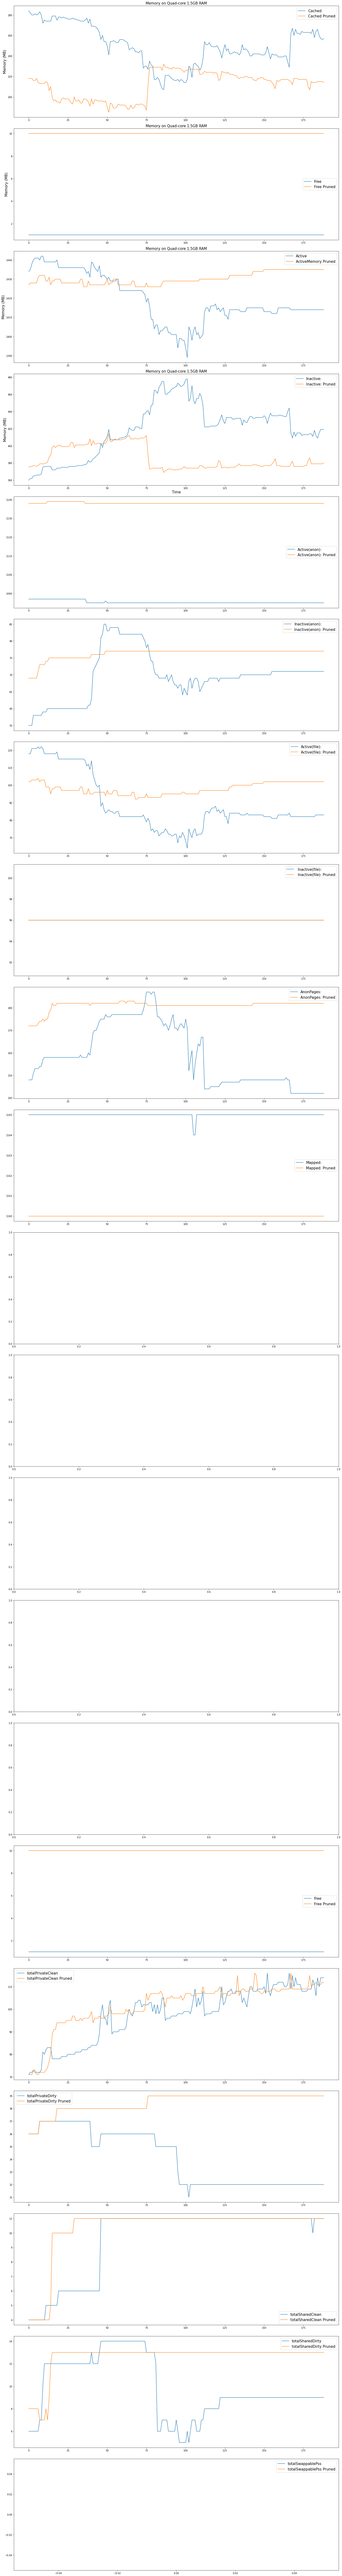

In [35]:
fig, axs = plt.subplots(21, figsize=(20, 150))
fpath = 'experiments/2021-05-21/'
df_mem_25 = pd.read_csv(fpath +'mem_testbed_1m_1.5gbram_swap_all_data.csv')
df_mem_pruned_25 = pd.read_csv(fpath + 'mem_testbed_1m_1.5gbram_swap_all_data_pruned.csv')

cached_mem_25 = df_mem_25['Cached_Memory(MB)']
cached_mem_pruned_25 = df_mem_pruned_25['Cached_Memory(MB)']

free_mem_25 = df_mem_25['Free_Memory(MB)']
free_mem_25_pruned = df_mem_pruned_25['Free_Memory(MB)']


iterations_25 = range(0, len(df_mem_25))
iterations_25_pruned = range(0, len(df_mem_pruned_25))

axs[0].plot(iterations_25_pruned, cached_mem_25[:len(iterations_25_pruned)], label='Cached')
axs[0].plot(iterations_25_pruned, cached_mem_pruned_25, label='Cached Pruned')

axs[0].legend(loc='best', fontsize=15);
axs[0].set_ylabel('Memory (MB)', fontsize=15)
axs[0].set_title('Memory on Quad-core 1.5GB RAM', fontsize=15)

axs[1].plot(iterations_25_pruned, df_mem_25['Free_Memory(MB)'][:len(iterations_25_pruned)], label='Free')
axs[1].plot(iterations_25_pruned, df_mem_pruned_25['Free_Memory(MB)'], label='Free Pruned')
axs[1].legend(loc='best', fontsize=15);

axs[2].plot(iterations_25_pruned, df_mem_25['Active_Memory(MB)'][:len(iterations_25_pruned)], label='Active')
axs[2].plot(iterations_25_pruned, df_mem_pruned_25['Active_Memory(MB)'], label='ActiveMemory Pruned')
axs[2].legend(loc='best', fontsize=15);


axs[3].plot(iterations_25_pruned, df_mem_25['Inactive:'][:len(iterations_25_pruned)], label='Inactive:')
axs[3].plot(iterations_25_pruned, df_mem_pruned_25['Inactive:'], label='Inactive: Pruned')
axs[3].legend(loc='best', fontsize=15);


axs[4].plot(iterations_25_pruned, df_mem_25['Active(anon):'][:len(iterations_25_pruned)], label='Active(anon):')
axs[4].plot(iterations_25_pruned, df_mem_pruned_25['Active(anon):'], label='Active(anon): Pruned')
axs[4].legend(loc='best', fontsize=15);

key = 'Inactive(anon):'

axs[5].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[5].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[5].legend(loc='best', fontsize=15);

key = 'Active(file):'

axs[6].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[6].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[6].legend(loc='best', fontsize=15);

key = ' Inactive(file):'

axs[7].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[7].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[7].legend(loc='best', fontsize=15);
key = 'AnonPages:'

axs[8].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[8].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[8].legend(loc='best', fontsize=15);
key = 'Mapped:'

axs[9].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[9].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[9].legend(loc='best', fontsize=15);
# key = 'KernelStack:'

# axs[10].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
# axs[10].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
# axs[10].legend(loc='best', fontsize=15);
# key = 'PageTables:'

# axs[11].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
# axs[11].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
# axs[11].legend(loc='best', fontsize=15);
# key = 'Committed_AS:'

# axs[12].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
# axs[12].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
# axs[12].legend(loc='best', fontsize=15);
# key = 'VmallocTotal:'

# axs[13].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
# axs[13].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
# axs[13].legend(loc='best', fontsize=15);
# key = 'VmallocUsed:'

# axs[14].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
# axs[14].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
# axs[14].legend(loc='best', fontsize=15);

# key = 'VmallocChunk:'
# axs[15].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
# axs[15].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
# axs[15].legend(loc='best', fontsize=15);

axs[15].plot(iterations_25_pruned, df_mem_25['Free_Memory(MB)'][:len(iterations_25_pruned)], label='Free')
axs[15].plot(iterations_25_pruned, df_mem_pruned_25['Free_Memory(MB)'], label='Free Pruned')
axs[15].legend(loc='best', fontsize=15);

key = 'totalPrivateClean'
axs[16].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[16].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[16].legend(loc='best', fontsize=15);

key = 'totalPrivateDirty'
axs[17].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[17].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[17].legend(loc='best', fontsize=15);

key = 'totalSharedClean'
axs[18].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[18].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[18].legend(loc='best', fontsize=15);

key = 'totalSharedDirty'
axs[19].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[19].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[19].legend(loc='best', fontsize=15);

key = 'totalSwappablePss'
axs[20].plot(iterations_25_pruned, df_mem_25[key][:len(iterations_25_pruned)], label=f'{key}')
axs[20].plot(iterations_25_pruned, df_mem_pruned_25[key], label=f'{key} Pruned')
axs[20].legend(loc='best', fontsize=15);

axs[3].set_ylabel('Memory (MB)', fontsize=15)
axs[3].set_title('Memory on Quad-core 1.5GB RAM', fontsize=15)
axs[3].set_xlabel('Time', fontsize=15)

axs[2].set_ylabel('Memory (MB)', fontsize=15)
axs[2].set_title('Memory on Quad-core 1.5GB RAM', fontsize=15)

axs[1].set_ylabel('Memory (MB)', fontsize=15)
axs[1].set_title('Memory on Quad-core 1.5GB RAM', fontsize=15)
axs[0].set_ylabel('Memory (MB)', fontsize=15)
axs[0].set_title('Memory on Quad-core 1.5GB RAM', fontsize=15)
plt.tight_layout()

plt.draw()
plt.savefig(f'memory_all.png')


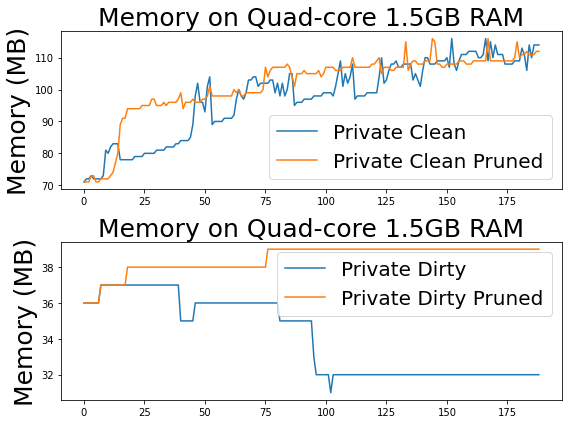

In [4]:
fig, axs = plt.subplots(2, figsize=(8, 6))
fpath = 'experiments/2021-05-21/'
df_mem_25 = pd.read_csv(fpath +'mem_testbed_1m_1.5gbram_swap_all_data.csv')
df_mem_pruned_25 = pd.read_csv(fpath + 'mem_testbed_1m_1.5gbram_swap_all_data_pruned.csv')

iterations_25 = range(0, len(df_mem_25))
iterations_25_pruned = range(0, len(df_mem_pruned_25))


# key = 'totalPrivateClean'
# key = 'totalPrivateDirty'
# key = 'totalSharedClean'
# key = 'totalSharedDirty'
# key = 'totalSwappablePss'

axs[0].plot(iterations_25_pruned, df_mem_25['totalPrivateClean'][:len(iterations_25_pruned)], label='Private Clean')
axs[0].plot(iterations_25_pruned, df_mem_pruned_25['totalPrivateClean'], label='Private Clean Pruned')
axs[0].legend(loc='best', fontsize=20);

axs[1].plot(iterations_25_pruned, df_mem_25['totalPrivateDirty'][:len(iterations_25_pruned)], label='Private Dirty')
axs[1].plot(iterations_25_pruned, df_mem_pruned_25['totalPrivateDirty'], label='Private Dirty Pruned')
axs[1].legend(loc='best', fontsize=20);

axs[1].set_ylabel('Memory (MB)', fontsize=25)
axs[1].set_title('Memory on Quad-core 1.5GB RAM', fontsize=25)
axs[0].set_ylabel('Memory (MB)', fontsize=25)
axs[0].set_title('Memory on Quad-core 1.5GB RAM', fontsize=25)


plt.tight_layout()
plt.savefig(f'memory_private_shared_1.5gb.png')


225
246


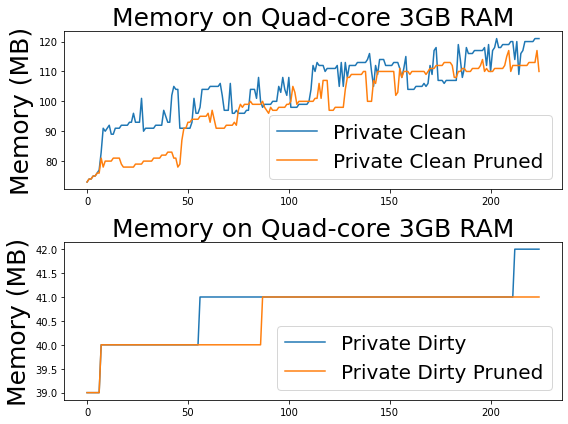

In [3]:
fig, axs = plt.subplots(2, figsize=(8, 6))
fpath = 'experiments/2021-05-21/'
df_mem_25 = pd.read_csv(fpath +'mem_testbed_1m_2.7gbram_swap_all_data.csv')
df_mem_pruned_25 = pd.read_csv(fpath + 'mem_testbed_1m_2.7gbram_swap_all_data_pruned.csv')

iterations_25 = range(0, len(df_mem_25))
iterations_25_pruned = range(0, len(df_mem_pruned_25))

print(len(df_mem_25))
print(len(df_mem_pruned_25))

iterations_25_pruned = range(0, 225)#range(0, min(len(df_mem_25), len(df_mem_pruned_25)))

# key = 'totalPrivateClean'
# key = 'totalPrivateDirty'
# key = 'totalSharedClean'
# key = 'totalSharedDirty'
# key = 'totalSwappablePss'

axs[0].plot(iterations_25_pruned, df_mem_25['totalPrivateClean'][:len(iterations_25_pruned)], label='Private Clean')
axs[0].plot(iterations_25_pruned, df_mem_pruned_25['totalPrivateClean'][:len(iterations_25_pruned)], label='Private Clean Pruned')
axs[0].legend(loc='best', fontsize=20);

axs[1].plot(iterations_25_pruned, df_mem_25['totalPrivateDirty'][:len(iterations_25_pruned)], label='Private Dirty')
axs[1].plot(iterations_25_pruned, df_mem_pruned_25['totalPrivateDirty'][:len(iterations_25_pruned)], label='Private Dirty Pruned')
axs[1].legend(loc='best', fontsize=20);

axs[1].set_ylabel('Memory (MB)', fontsize=25)
axs[1].set_title('Memory on Quad-core 3GB RAM', fontsize=25)
axs[0].set_ylabel('Memory (MB)', fontsize=25)
axs[0].set_title('Memory on Quad-core 3GB RAM', fontsize=25)


plt.tight_layout()
plt.savefig(f'memory_private_shared_2.7gb.png')


## Debugging differences in round completion time and mobile training time

In [339]:
def generate_bar_plot():
    fig, ax = plt.subplots(figsize=(12,6))


    bar_plot = sns.barplot(x="model_params",y="round_completion_time",data=combined_frame, hue="prune_percentage",capsize=0.1)
    bar_plot.set_yscale("log")
    bar_plot.set_ylabel('Round Completion Time')
    bar_plot.set_xlabel('Model Parameters')          
    bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

    bar_plot.set_title('Round Completion Time Across 4 Model Sizes', fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylabel('Round time (in seconds)', fontsize=25)
    ax.set_xlabel('Model Parameters', fontsize=20)
    plt.tight_layout()
    count = 0
    for p in bar_plot.patches:
        if count == 0 or count == 4 or count ==8 or count == 14 : # 1K
            bar_plot.annotate(round(p.get_height(), 2), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.15), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')  
        elif count == 1 or count == 12: # 10K
            bar_plot.annotate(round(p.get_height(), 2), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.25), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')  
        elif count == 2 or count == 5 or count == 6 or count == 7: # 100K
            bar_plot.annotate(round(p.get_height(), 2), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.1), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')  
        elif count == 3:
            bar_plot.annotate(math.ceil(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.05), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
        elif count == 9:
            bar_plot.annotate(math.ceil(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.5), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
        elif count == 10:
            bar_plot.annotate(math.ceil(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.4), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
        elif count == 11:
            bar_plot.annotate(math.ceil(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.05), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
        elif count == 13:
            bar_plot.annotate(math.ceil(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.45), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 
        elif count == 15:
            bar_plot.annotate(math.ceil(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*1.15), 
                       ha = 'center', va = 'center', 
                       xytext = (1, 9), 
                       textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large') 

        count += 1
    plt.savefig('barplot_ci_round_time_combined.png')

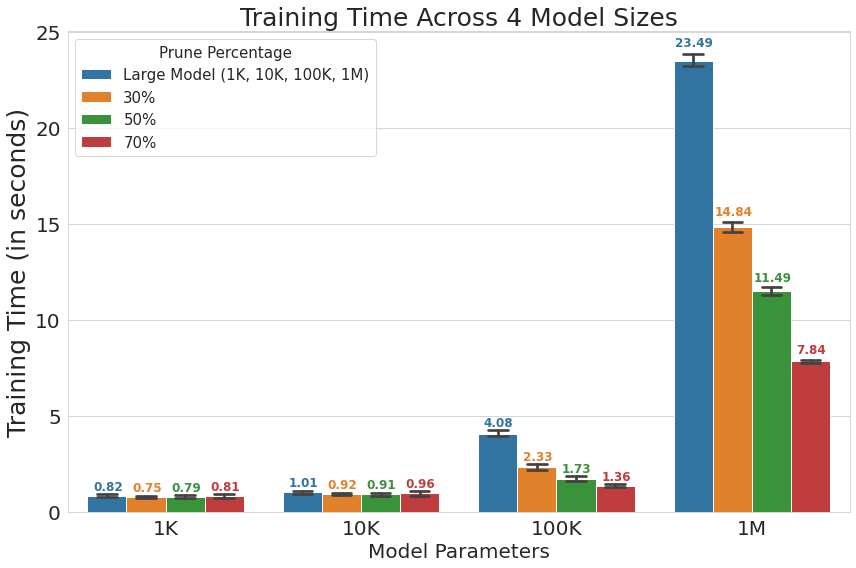

In [340]:
def get_data_to_barplot(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1k.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1k_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_10k.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_10k_pruned.csv' # change to None if desired
    
    testbed_100k = fpath + 'metrics_stat_testbed_100k.csv' # change to None if desired
    testbed_100k_pruned = fpath + 'metrics_stat_testbed_100k_pruned.csv' # change to None if desired
    
    testbed_1m = fpath + 'metrics_stat_testbed_1m.csv' # change to None if desired
    testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_pruned.csv' # change to None if desired
    
    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)
    
    
    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
    metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

    metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
    metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
    metrics_testbed_1k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
    metrics_testbed_1k['model_params'] = '1K'
    
    
    metrics_testbed_1k_pruned["model_params"] = '1K'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['model_params'] = '10K'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["model_params"] = '10K'
    
    metrics_testbed_100k['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_100k['model_params'] = '100K'
    metrics_testbed_100k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_100k_pruned["model_params"] = '100K'
    

    metrics_testbed_1m['prune_percentage'] = 'Large Model (1K, 10K, 100K, 1M)'
    metrics_testbed_1m['model_params'] = '1M'

#     metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1, ['prune_percentage']] = f'Large Model (1K, 10K, 100K, 1M)'
#     metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 0, ['prune_percentage']] = f'Fast Device (1K, 10K, 100K, 1M)'

    
    
    metrics_testbed_1m_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_1m_pruned["model_params"] = '1M'
    
    
#     print(metrics_testbed_1k['total_train_time']/1000 )
    
    metrics_testbed_1k['total_train_time'] = metrics_testbed_1k['total_train_time'].astype('float') / 1000
    metrics_testbed_1k_pruned['total_train_time'] = metrics_testbed_1k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_10k['total_train_time'] = metrics_testbed_10k['total_train_time'].astype('float') / 1000
    metrics_testbed_10k_pruned['total_train_time'] = metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_100k['total_train_time'] = metrics_testbed_100k['total_train_time'].astype('float') / 1000
    metrics_testbed_100k_pruned['total_train_time'] = metrics_testbed_100k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_1m['total_train_time'] = metrics_testbed_1m['total_train_time'].astype('float') / 1000
    metrics_testbed_1m_pruned['total_train_time'] = metrics_testbed_1m_pruned['total_train_time'].astype('float') / 1000

    '''
    Plot training times for slow device only
    '''
    
    
    df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
    df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

    df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
    df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

    df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
    df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
    panda_frames.append(df_slow_device_100k_pruned)
    panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
    panda_frames.append(df_slow_device_100k)
    panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned



def get_data_to_barplot_slow_fast(pruning_percentage, date):
    fpath = f'{date}/{pruning_percentage}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_1k.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_1k_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_10k.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_10k_pruned.csv' # change to None if desired
    
    testbed_100k = fpath + 'metrics_stat_testbed_100k.csv' # change to None if desired
    testbed_100k_pruned = fpath + 'metrics_stat_testbed_100k_pruned.csv' # change to None if desired
    
    testbed_1m = fpath + 'metrics_stat_testbed_1m.csv' # change to None if desired
    testbed_1m_pruned = fpath + 'metrics_stat_testbed_1m_pruned.csv' # change to None if desired
    
    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)
    
    
    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)

    metrics_testbed_100k= visualization_utils.load_data(testbed_100k)
    metrics_testbed_100k_pruned = visualization_utils.load_data(testbed_100k_pruned)

    metrics_testbed_1m= visualization_utils.load_data(testbed_1m)
    metrics_testbed_1m_pruned = visualization_utils.load_data(testbed_1m_pruned)
    
    metrics_testbed_1k['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
    metrics_testbed_1k['model_params'] = '1K'
    
    
    metrics_testbed_1k_pruned["model_params"] = '1K'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['model_params'] = '10K'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["model_params"] = '10K'
    
    metrics_testbed_100k['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_100k['model_params'] = '100K'
    metrics_testbed_100k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_100k_pruned["model_params"] = '100K'
    

    metrics_testbed_1m['prune_percentage'] = 'Slow Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1m['model_params'] = '1M'
    metrics_testbed_1m_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_1m_pruned["model_params"] = '1M'
    
    
#     print(metrics_testbed_1k['total_train_time']/1000 )
    
    metrics_testbed_1k['total_train_time'] = metrics_testbed_1k['total_train_time'].astype('float') / 1000
    metrics_testbed_1k_pruned['total_train_time'] = metrics_testbed_1k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_10k['total_train_time'] = metrics_testbed_10k['total_train_time'].astype('float') / 1000
    metrics_testbed_10k_pruned['total_train_time'] = metrics_testbed_10k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_100k['total_train_time'] = metrics_testbed_100k['total_train_time'].astype('float') / 1000
    metrics_testbed_100k_pruned['total_train_time'] = metrics_testbed_100k_pruned['total_train_time'].astype('float') / 1000
    metrics_testbed_1m['total_train_time'] = metrics_testbed_1m['total_train_time'].astype('float') / 1000
    metrics_testbed_1m_pruned['total_train_time'] = metrics_testbed_1m_pruned['total_train_time'].astype('float') / 1000

    '''
    Plot training times for slow device only
    '''
    
    
    df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
    df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]

    df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
    df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

    df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
    df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    
    metrics_testbed_1k['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1k['model_params'] = '1K'
    
    metrics_testbed_10k['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_10k['model_params'] = '10K'
    
    metrics_testbed_100k['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_100k['model_params'] = '100K'
    
    metrics_testbed_1m['prune_percentage'] = 'Fast Device (1K, 10K, 100K, 1M)'
    metrics_testbed_1m['model_params'] = '1M'
    
    
    df_fast_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 0]
    df_fast_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 0]
    df_fast_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 0]
    df_fast_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 0]
    
    
    
    
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_1k_pruned)
    panda_frames.append(df_slow_device_10k_pruned)
    panda_frames.append(df_slow_device_100k_pruned)
    panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
    panda_frames.append(df_fast_device_1k)
    panda_frames.append(df_fast_device_10k)
    panda_frames.append(df_fast_device_100k)
    panda_frames.append(df_fast_device_1m)
    
    panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_10k)
    panda_frames.append(df_slow_device_100k)
    panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

combined_pruned_frame_30, combined_frame_30 = get_data_to_barplot(30, '16-07-2021')
combined_pruned_frame_50, combined_frame_50 = get_data_to_barplot(50, '16-07-2021')
combined_pruned_frame_70, combined_frames_70 = get_data_to_barplot(70, '16-07-2021')

panda_frames = []


panda_frames.append(combined_frame_30)
panda_frames.append(combined_pruned_frame_30)
panda_frames.append(combined_pruned_frame_50)
panda_frames.append(combined_pruned_frame_70)

combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(figsize=(12,8))


bar_plot = sns.barplot(x="model_params",y="total_train_time",data=combined_frame, hue="prune_percentage",capsize=0.1)
# bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

bar_plot.set_title('Training Time Across 4 Model Sizes', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Training Time (in seconds)', fontsize=25)
ax.set_xlabel('Model Parameters', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(round(p.get_height(), 2), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
plt.savefig('barplot_ci_training_time_combined.png')

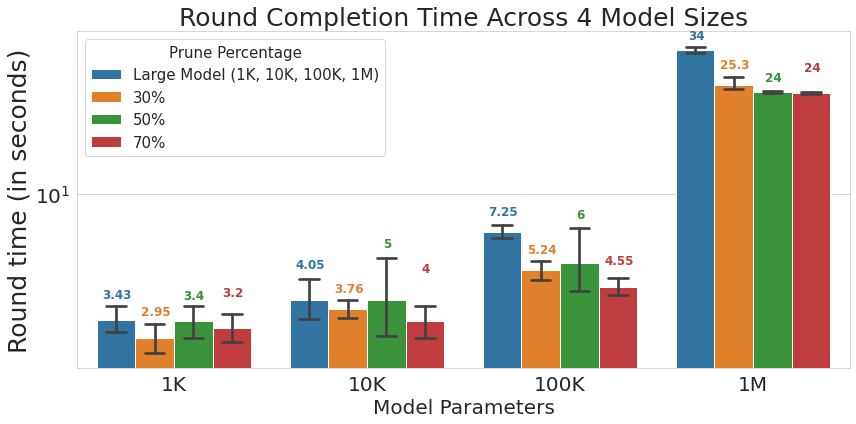

In [341]:
generate_bar_plot()

In [71]:
def get_data_to_plot(pruning_percentage, mp):
    fpath = f'19-08-2021/2/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    def get_metrics(model_size):
        testbed_1k_0 = fpath + f'metrics_stat_testbed_{model_size}_normal.csv' # change to None if desired
        testbed_1k_pruned_0 = fpath + f'metrics_stat_testbed_{model_size}_normal_pruned.csv' # change to None if desired
        
        testbed_1k_25 = fpath + f'metrics_stat_testbed_{model_size}_critical.csv' # change to None if desired
        testbed_1k_pruned_25 = fpath + f'metrics_stat_testbed_{model_size}_critical_pruned.csv' # change to None if desired
        
#         testbed_1k_60 = fpath + f'metrics_stat_testbed_{model_size}_60.csv' # change to None if desired
#         testbed_1k_pruned_60 = fpath + f'metrics_stat_testbed_{model_size}_pruned_60.csv' # change to None if desired
        
#         testbed_1k_95 = fpath + f'metrics_stat_testbed_{model_size}_95.csv' # change to None if desired
#         testbed_1k_pruned_95 = fpath + f'metrics_stat_testbed_{model_size}_pruned_95.csv' # change to None if desired

    
        metrics_testbed_1k_0 = visualization_utils.load_data(testbed_1k_0)
        metrics_testbed_1k_pruned_0 = visualization_utils.load_data(testbed_1k_pruned_0)
        
        metrics_testbed_1k_25 = visualization_utils.load_data(testbed_1k_25)
        metrics_testbed_1k_pruned_25 = visualization_utils.load_data(testbed_1k_pruned_25)
        
#         metrics_testbed_1k_60 = visualization_utils.load_data(testbed_1k_60)
#         metrics_testbed_1k_pruned_60 = visualization_utils.load_data(testbed_1k_pruned_60)
        
#         metrics_testbed_1k_95 = visualization_utils.load_data(testbed_1k_95)
#         metrics_testbed_1k_pruned_95 = visualization_utils.load_data(testbed_1k_pruned_95)
        
        metrics_testbed_1k_0['memory_pressure'] = 'Normal'
        metrics_testbed_1k_0['model_params'] = model_size.upper()
        
        metrics_testbed_1k_pruned_0['memory_pressure'] = 'Normal'
        metrics_testbed_1k_pruned_0['model_params'] = model_size.upper()
        
        metrics_testbed_1k_0['prune_percentage'] = 'Large Model (1M)'
        metrics_testbed_1k_pruned_0["prune_percentage"] = f'{pruning_percentage}%'
        
        metrics_testbed_1k_25['memory_pressure'] = 'Critical'
        metrics_testbed_1k_25['model_params'] = model_size.upper()
        
        metrics_testbed_1k_pruned_25['memory_pressure'] = 'Critical'
        metrics_testbed_1k_pruned_25['model_params'] = model_size.upper()
        
        metrics_testbed_1k_25['prune_percentage'] = 'Large Model (1M)'
        metrics_testbed_1k_pruned_25["prune_percentage"] = f'{pruning_percentage}%'
        
#         metrics_testbed_1k_60['memory_pressure'] = 'medium'
#         metrics_testbed_1k_60['model_params'] = model_size.upper()
        
#         metrics_testbed_1k_pruned_60['memory_pressure'] = 'medium'
#         metrics_testbed_1k_pruned_60['model_params'] = model_size.upper()
        
#         metrics_testbed_1k_60['prune_percentage'] = 'Large Model (10K, 100K, 1M)'
#         metrics_testbed_1k_pruned_60["prune_percentage"] = f'{pruning_percentage}%'
        
#         metrics_testbed_1k_95['memory_pressure'] = 'high'
#         metrics_testbed_1k_95['model_params'] = model_size.upper()
        
#         metrics_testbed_1k_pruned_95['memory_pressure'] = 'high'
#         metrics_testbed_1k_pruned_95['model_params'] = model_size.upper()
#         metrics_testbed_1k_95['prune_percentage'] = 'Large Model (10K, 100K, 1M)'
#         metrics_testbed_1k_pruned_95["prune_percentage"] = f'{pruning_percentage}%'
        
        df_slow_device_1k_0 = metrics_testbed_1k_0.loc[metrics_testbed_1k_0['is_slow'] == 1]
        df_slow_device_1k_pruned_0 = metrics_testbed_1k_pruned_0.loc[metrics_testbed_1k_pruned_0['is_slow'] == 1]
        
        df_slow_device_1k_25 = metrics_testbed_1k_25.loc[metrics_testbed_1k_25['is_slow'] == 1]
        df_slow_device_1k_pruned_25 = metrics_testbed_1k_pruned_25.loc[metrics_testbed_1k_pruned_25['is_slow'] == 1]
        
#         df_slow_device_1k_60 = metrics_testbed_1k_60.loc[metrics_testbed_1k_60['is_slow'] == 1]
#         df_slow_device_1k_pruned_60 = metrics_testbed_1k_pruned_60.loc[metrics_testbed_1k_pruned_60['is_slow'] == 1]
        
#         df_slow_device_1k_95 = metrics_testbed_1k_95.loc[metrics_testbed_1k_95['is_slow'] == 1]
#         df_slow_device_1k_pruned_95 = metrics_testbed_1k_pruned_95.loc[metrics_testbed_1k_pruned_95['is_slow'] == 1]
        
        
        
        panda_frames = []
    
#         if mp == 'normal':
        panda_frames.append(df_slow_device_1k_pruned_0)
#             panda_frames.append(df_slow_device_1k_pruned_25)
#         elif mp == 'medium':
#             panda_frames.append(df_slow_device_1k_pruned_60)
#         elif mp == 'critical':
        panda_frames.append(df_slow_device_1k_pruned_25)
        
        combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
        panda_frames = []

#         if mp == 'normal':
        panda_frames.append(df_slow_device_1k_0)
#             panda_frames.append(df_slow_device_1k_25)
#         elif mp == 'medium':
#             panda_frames.append(df_slow_device_1k_60)
#         elif mp == 'critical':
        panda_frames.append(df_slow_device_1k_25)

        combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
        
        
        
        return combined_pruned_frame, combined_frame
    
    all_model_sizes_frames = []
    
#     combined_pruned_frame_1k, large_model_1k = get_metrics('1k')
#     combined_pruned_frame_10k, large_model_10k = get_metrics('10k')
#     combined_pruned_frame_100k, large_model_100k = get_metrics('100k')
    combined_pruned_frame_1m, large_model_1m = get_metrics('1m')
    print("all_model_sizes_frames", len(all_model_sizes_frames))
# #     all_model_sizes_frames.append(large_model_1k)
#     all_model_sizes_frames.append(large_model_10k)
#     all_model_sizes_frames.append(large_model_100k)
    all_model_sizes_frames.append(large_model_1m)
# #     all_model_sizes_frames.append(combined_pruned_frame_1k)
#     all_model_sizes_frames.append(combined_pruned_frame_10k)
#     all_model_sizes_frames.append(combined_pruned_frame_100k)
    all_model_sizes_frames.append(combined_pruned_frame_1m)
    
    combined_frame = pd.concat(all_model_sizes_frames, axis=0, ignore_index=True)
    
    
    
    return combined_frame

all_model_sizes_frames 0


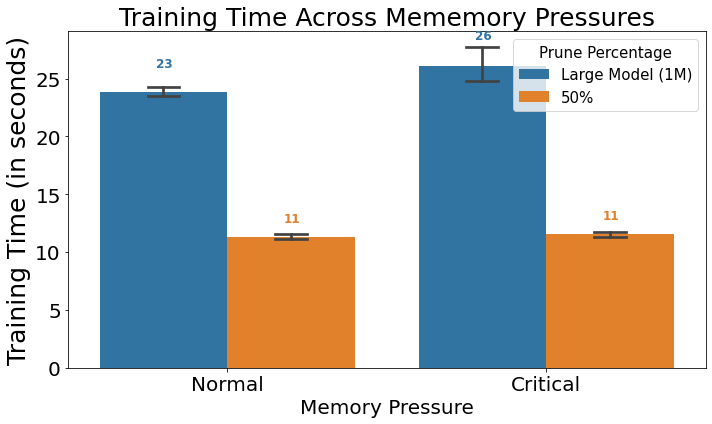

In [85]:
fig, ax = plt.subplots(figsize=(10,6))

combined_frame = get_data_to_plot('50', 'mp')
combined_frame["total_train_time"] = combined_frame["total_train_time"] / 1000
bar_plot = sns.barplot(x="memory_pressure",y="total_train_time",data=combined_frame, hue="prune_percentage",capsize=0.1)
# bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

bar_plot.set_title('Training Time Across Mememory Pressures', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Training Time (in seconds)', fontsize=25)
ax.set_xlabel('Memory Pressure', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(math.floor(p.get_height()/1), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.07), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
plt.savefig('barplot_ci_training_time_mp_combined.png')

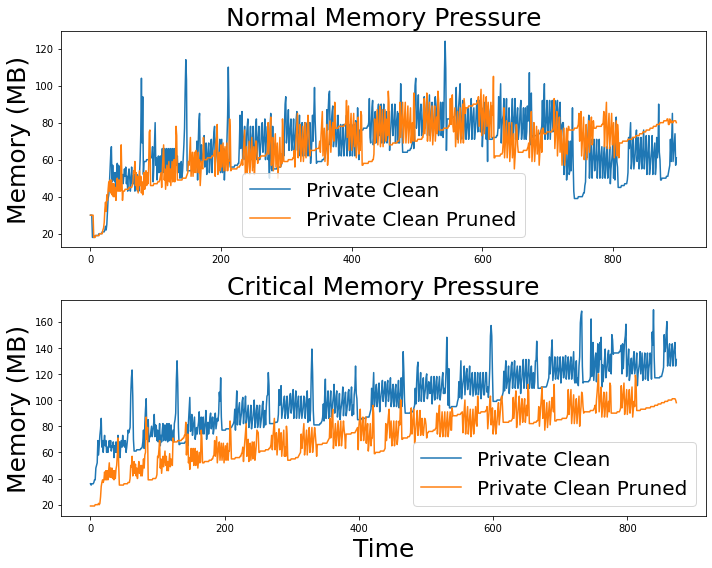

In [92]:

fpath = '19-08-2021/2/'
df_mem_normal = pd.read_csv(fpath +'mem_testbed_1m_normal.csv')
df_mem_normal_pruned = pd.read_csv(fpath + 'mem_testbed_1m_normal_pruned.csv')

df_mem_critical = pd.read_csv(fpath +'mem_testbed_1m_critical.csv')
df_mem_critical_pruned = pd.read_csv(fpath + 'mem_testbed_1m_critical_pruned.csv')


iterations_normal = range(0, len(df_mem_normal))
iterations_normal_pruned = range(0, len(df_mem_normal_pruned))

iterations_critical_pruned = range(0, len(df_mem_critical_pruned))


# key = 'totalPrivateClean'
# key = 'totalPrivateDirty'
# key = 'totalSharedClean'
# key = 'totalSharedDirty'
# key = 'totalSwappablePss'

fig, axs = plt.subplots(2, figsize=(10, 8))
axs[0].plot(iterations_normal_pruned, df_mem_normal['totalPrivateClean'][:len(iterations_normal_pruned)], label='Private Clean')
axs[0].plot(iterations_normal_pruned, df_mem_normal_pruned['totalPrivateClean'], label='Private Clean Pruned')
axs[0].legend(loc='best', fontsize=20);

# axs[1].plot(iterations_normal_pruned, df_mem_normal['totalPrivateDirty'][:len(iterations_normal_pruned)], label='Private Dirty')
# axs[1].plot(iterations_normal_pruned, df_mem_normal_pruned['totalPrivateDirty'], label='Private Dirty Pruned')
# axs[1].legend(loc='best', fontsize=20);

axs[1].plot(iterations_critical_pruned, df_mem_critical['totalPrivateClean'][:len(iterations_critical_pruned)], label='Private Clean')
axs[1].plot(iterations_critical_pruned, df_mem_critical_pruned['totalPrivateClean'], label='Private Clean Pruned')
axs[1].legend(loc='best', fontsize=20);

axs[1].set_ylabel('Memory (MB)', fontsize=25)
axs[1].set_xlabel('Time', fontsize=25)
axs[1].set_title('Critical Memory Pressure', fontsize=25)
axs[0].set_ylabel('Memory (MB)', fontsize=25)
axs[0].set_title('Normal Memory Pressure', fontsize=25)


plt.tight_layout()
plt.savefig(f'memory_private_clean_normal.png')


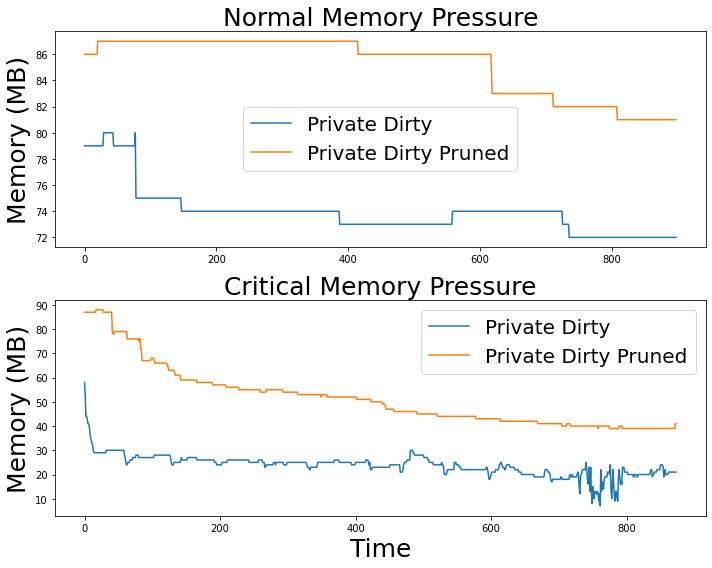

In [93]:

cached_mem_normal = df_mem_normal['Cached_Memory(MB)']
cached_mem_normal_pruned = df_mem_normal_pruned['Cached_Memory(MB)']

free_mem_normal = df_mem_normal['Free_Memory(MB)']
free_mem_normal_pruned = df_mem_normal_pruned['Free_Memory(MB)']

fig, axs = plt.subplots(2, figsize=(10, 8))
axs[0].plot(iterations_normal_pruned, df_mem_normal['totalPrivateDirty'][:len(iterations_normal_pruned)], label='Private Dirty')
axs[0].plot(iterations_normal_pruned, df_mem_normal_pruned['totalPrivateDirty'], label='Private Dirty Pruned')
# axs[0].plot(iterations_normal_pruned, df_mem_normal['Free_Memory(MB)'][:len(iterations_normal_pruned)], label='Free')
# axs[0].plot(iterations_normal_pruned, df_mem_normal_pruned['Free_Memory(MB)'], label='Free Pruned')
axs[0].legend(loc='best', fontsize=20);

# axs[1].plot(iterations_normal_pruned, df_mem_normal['totalPrivateDirty'][:len(iterations_normal_pruned)], label='Private Dirty')
# axs[1].plot(iterations_normal_pruned, df_mem_normal_pruned['totalPrivateDirty'], label='Private Dirty Pruned')
# axs[1].legend(loc='best', fontsize=20);

axs[1].plot(iterations_critical_pruned, df_mem_critical['totalPrivateDirty'][:len(iterations_critical_pruned)], label='Private Dirty')
axs[1].plot(iterations_critical_pruned, df_mem_critical_pruned['totalPrivateDirty'], label='Private Dirty Pruned')
# axs[1].plot(iterations_critical_pruned, df_mem_critical['Free_Memory(MB)'][:len(iterations_critical_pruned)], label='Free')
# axs[1].plot(iterations_critical_pruned, df_mem_critical_pruned['Free_Memory(MB)'], label='Free Pruned')
axs[1].legend(loc='best', fontsize=20);

axs[1].set_ylabel('Memory (MB)', fontsize=25)
axs[1].set_title('Critical Memory Pressure', fontsize=25)
axs[1].set_xlabel('Time', fontsize=25)
axs[0].set_ylabel('Memory (MB)', fontsize=25)
axs[0].set_title('Normal Memory Pressure', fontsize=25)


plt.tight_layout()
plt.savefig(f'memory_private_dirty_normal.png')


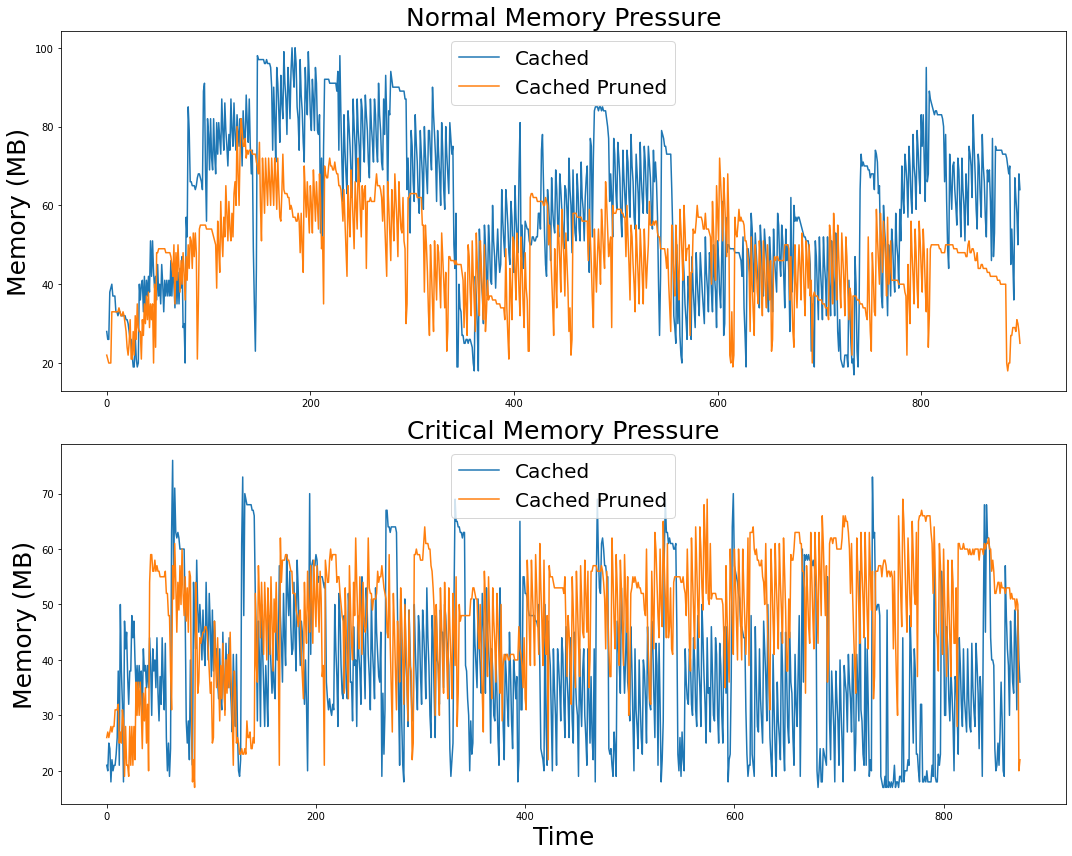

In [103]:
cached_mem_normal = df_mem_normal['Cached_Memory(MB)']
cached_mem_normal_pruned = df_mem_normal_pruned['Cached_Memory(MB)']

free_mem_normal = df_mem_normal['Free_Memory(MB)']
free_mem_normal_pruned = df_mem_normal_pruned['Free_Memory(MB)']

fig, axs = plt.subplots(2, figsize=(10, 8))
axs[0].plot(iterations_normal_pruned, df_mem_normal['Cached_Memory(MB)'][:len(iterations_normal_pruned)], label='Cached')
axs[0].plot(iterations_normal_pruned, df_mem_normal_pruned['Cached_Memory(MB)'], label='Cached Pruned')
# axs[0].plot(iterations_normal_pruned, df_mem_normal['Free_Memory(MB)'][:len(iterations_normal_pruned)], label='Free')
# axs[0].plot(iterations_normal_pruned, df_mem_normal_pruned['Free_Memory(MB)'], label='Free Pruned')
axs[0].legend(loc='best', fontsize=20);

axs[1].plot(iterations_critical_pruned, df_mem_critical['Cached_Memory(MB)'][:len(iterations_critical_pruned)], label='Cached')
axs[1].plot(iterations_critical_pruned, df_mem_critical_pruned['Cached_Memory(MB)'], label='Cached Pruned')
# axs[1].plot(iterations_critical_pruned, df_mem_critical['Free_Memory(MB)'][:len(iterations_critical_pruned)], label='Free')
# axs[1].plot(iterations_critical_pruned, df_mem_critical_pruned['Free_Memory(MB)'], label='Free Pruned')
axs[1].legend(loc='upper center', fontsize=20);

axs[1].set_ylabel('Memory (MB)', fontsize=25)
axs[1].set_title('Critical Memory Pressure', fontsize=25)
axs[1].set_xlabel('Time', fontsize=25)
axs[0].set_ylabel('Memory (MB)', fontsize=25)
axs[0].set_title('Normal Memory Pressure', fontsize=25)


plt.tight_layout()
plt.savefig(f'memory_cached.png')

In [33]:
testbed_1k = pd.read_csv('server_times.csv') # change to None if desired

[Text(0, 0, 'Authentication (Server)'), Text(1, 0, 'Firebase token (Server)'), Text(2, 0, 'Request for round (Server)'), Text(3, 0, 'Download Plan (Server)'), Text(4, 0, 'Download Model (Server)'), Text(5, 0, 'Report Updates (Server)'), Text(6, 0, 'Aggregation (Server)'), Text(7, 0, 'Download Model'), Text(8, 0, 'Report Model Updates'), Text(9, 0, 'Training time on Mobile'), Text(10, 0, 'Round Completion Time'), Text(11, 0, 'Push Notification Time')]


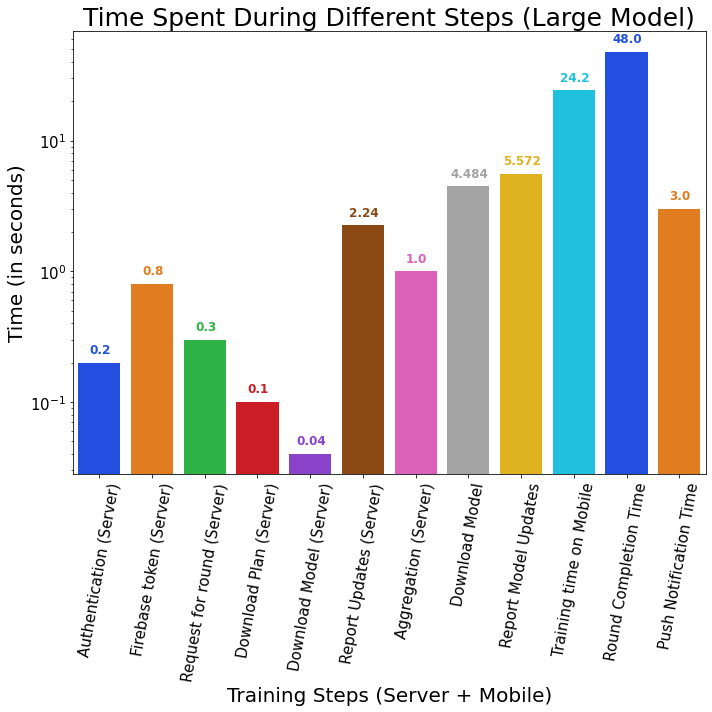

In [59]:
fig, ax = plt.subplots(figsize=(10,10))

bar_plot = sns.barplot(x="Name",y="Large Model",data=testbed_1k,capsize=0.1,palette="bright")
bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          
# bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

bar_plot.set_title('Time Spent During Different Steps (Large Model)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ylabel('Time (in seconds)', fontsize=20)
ax.set_xlabel('Training Steps (Server + Mobile)', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.07), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
print(bar_plot.get_xticklabels())
for item in bar_plot.get_xticklabels():
    item.set_rotation(80)
plt.tight_layout()
plt.savefig('barplot_ci_time_during_steps_large.png')

[Text(0, 0, 'Authentication (Server)'), Text(1, 0, 'Firebase token (Server)'), Text(2, 0, 'Request for round (Server)'), Text(3, 0, 'Download Plan (Server)'), Text(4, 0, 'Download Model (Server)'), Text(5, 0, 'Report Updates (Server)'), Text(6, 0, 'Aggregation (Server)'), Text(7, 0, 'Download Model'), Text(8, 0, 'Report Model Updates'), Text(9, 0, 'Training time on Mobile'), Text(10, 0, 'Round Completion Time'), Text(11, 0, 'Push Notification Time')]


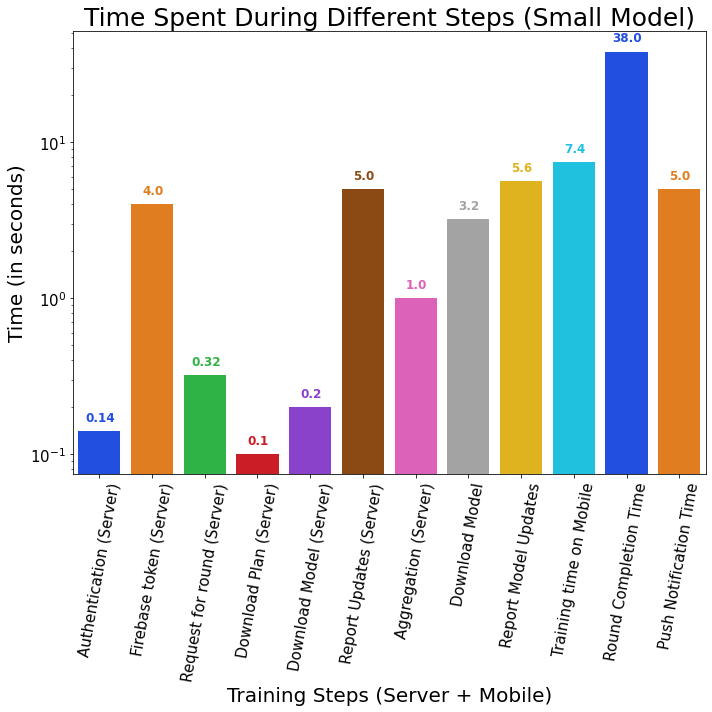

In [60]:
fig, ax = plt.subplots(figsize=(10,10))

bar_plot = sns.barplot(x="Name",y="Small Model",data=testbed_1k,capsize=0.1,palette="bright")
bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('Model Parameters')          
# bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)

bar_plot.set_title('Time Spent During Different Steps (Small Model)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ylabel('Time (in seconds)', fontsize=20)
ax.set_xlabel('Training Steps (Server + Mobile)', fontsize=20)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.07), 
                   ha = 'center', va = 'center', 
                   xytext = (1, 9), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
print(bar_plot.get_xticklabels())
for item in bar_plot.get_xticklabels():
    item.set_rotation(80)
plt.tight_layout()

plt.savefig('barplot_ci_time_during_steps_small.png')